# **Heart Disease Prediction**

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [3]:
data = pd.read_csv('values.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
data.shape

(180, 14)

In [5]:
tp = pd.read_csv('labels.csv')
tp.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
# Merging the two datasets together based upon a common column on both the datasets
data = pd.merge(data,tp,on = 'patient_id')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## basic checks 

In [8]:
data.shape

(180, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [10]:
data.count()

patient_id                              180
slope_of_peak_exercise_st_segment       180
thal                                    180
resting_blood_pressure                  180
chest_pain_type                         180
num_major_vessels                       180
fasting_blood_sugar_gt_120_mg_per_dl    180
resting_ekg_results                     180
serum_cholesterol_mg_per_dl             180
oldpeak_eq_st_depression                180
sex                                     180
age                                     180
max_heart_rate_achieved                 180
exercise_induced_angina                 180
heart_disease_present                   180
dtype: int64

In [11]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [13]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [14]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [15]:
## checking if there is any duplicate values 
data.duplicated().sum()

0

In [16]:
## finding data columns 
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [17]:
# finding data types
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [19]:
data.describe(include = ['O']).T

,count,unique,top,freq
patient_id,180,180,0z64un,1
thal,180,3,normal,98


### Finding Null or Missing values in the dataset

In [21]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### **Exploratory Data Analysis**

### Univariate Analysis

In [24]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [43]:
for x in data.columns:
    print('---------- unique values on the column -------------')
    print(data[x].unique())
    print('\n')
    print(data[x].value_counts())
    print('\n')

---------- unique values on the column -------------
['0z64un' 'ryoo3j' 'yt1s1x' 'l2xjde' 'oyt4ek' 'ldukkw' '2gbyh9' 'daa9kp'
 '3nwy2n' '1r508r' 'ldg4b9' 'xc17yq' 'mpggsq' 'zlyac8' 'f06u72' '2fv3rc'
 'qyrkxn' '237mql' 'mc750a' '30v796' 'cvux3j' 'k8899q' 'jhdvtb' '5g9v0h'
 '83asqd' 'gla0im' 'zzmfh7' 'f4g1ay' 'lek9q9' '8265rl' '6017a1' 'z7xkou'
 'k7ef7h' '0n5fu0' '55xksg' 'pjgqa3' 'xkdz7j' 'tpuevg' 'ascl42' '1xwoe6'
 'ty4ik8' 'gx6yxl' 'hlmts5' 'yx0q6k' 'ep1o51' 'gj1e5z' '6219kl' 'rp9g6x'
 '1aeaff' 'y3prof' '3drd48' 'ejo7p3' 'r7y4i1' 'mznwxv' '27oevk' 'jwqi3k'
 '328lkl' 'tlk9o8' 'aq2vrq' 'ilogfb' 'rv6siv' 'm2a4i9' 'pwigd8' 'qwapdq'
 '4sd1xn' 'nck22c' 'm6zksp' 'f70grj' 'k1art8' 'mcwqgs' '3jsjqk' 'ik7hfs'
 'qwj1yf' 'qvhk9e' 'igwnqo' '4v0q7o' 'hh2awp' 'vfjppl' '6lu42b' 'shiro4'
 '3wl3z4' 'ebioez' '37c0vm' 'v52zcs' '6nkcaw' 'hfp05i' 'grfxwd' 'bvcxah'
 'i49srr' '93dbhq' 'jscmp8' 'zaytyf' 'wze8qm' 'w3933i' '7uch9x' 'dy5hxt'
 'c0gkqc' 'z5g5p3' 'h3uzv8' 'bthqr4' 'rfj25e' '9f92et' '24fopx' 'ldr1mz

In [45]:
# removing 'patient_id' from the dataset
data.drop(columns = 'patient_id',inplace = True)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [47]:
# Creating a categorical datatype only columns or features
coltype = data.select_dtypes(include = 'object')
coltype

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


In [49]:
# creating a numerical datatype only columns or features
numtype = data.select_dtypes(exclude = 'object')
numtype

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [51]:
data['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

### Bivariate Analysis

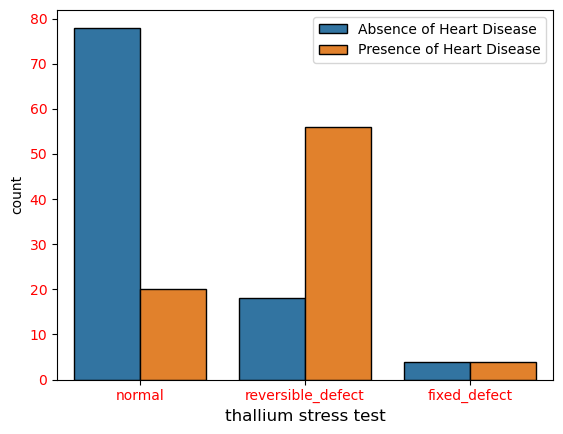

In [54]:
# thallium stress test
sns.countplot(data = data,x = 'thal',hue = 'heart_disease_present',edgecolor = 'black')
plt.xlabel('thallium stress test',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'red')
plt.yticks(color = 'red')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

## Thalium stress test 
- A thallium stress test, also known as a nuclear stress test, is a heart imaging test that uses a radioactive tracer to assess blood flow to the heart

### Insights:
- Majority of the people who got the results of **thallium stress test** as **normal** tend to have **no heart disease** at all.
- But the people who got **reversible defect** as the result for the **thallium stress test** tend to have a higher number of **heart disease** cases present.
- With **fixed defect** result from the **thallium stress test** the result seems to be balanced. we cannot interpret the outcome of heart present or not from that result class value.

###  Analysis for independent discreate numerical columns

In [57]:
discreatecols = ['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results',\
                 'sex','exercise_induced_angina','heart_disease_present']
discreatecols

['slope_of_peak_exercise_st_segment',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

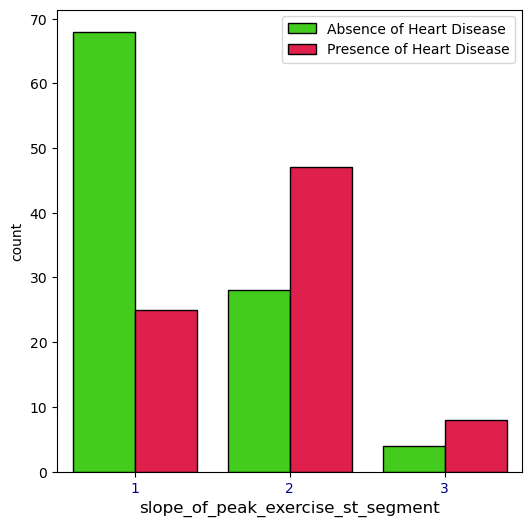

In [113]:
# Slope of peak excercise st segment 
plt.figure(figsize = (6,6))
sns.countplot(data = numtype,x = 'slope_of_peak_exercise_st_segment',hue = 'heart_disease_present',edgecolor = 'black',palette = 'prism')
plt.xlabel('slope_of_peak_exercise_st_segment',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'black')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

**The slope of the ST segment** during peak exercise in an electrocardiograph (ECG) reading is an important parameter used to evaluate the presence and severity of myocardial ischemia, which occurs when the heart muscle does not get enough oxygen due to reduced blood flow, typically from coronary artery disease.

The greater the magnitude and duration of the ST segment depression, the more likely it is to indicate significant ischemia.
- **Mild : < 1mm Depression**.
- **Moderate : 1-2mm Depression**.
- **Severe : 2mm Depression**.

- In the data have **slope_of_peak_excercise_st_segment** value of **1**, which indicates mild depression and less chance of **heart disease** present in them.
- On the other hand people with high values of **slope_of_peak_excercise_st_segment** indicates higher chance of **presence of heart disease** in them.

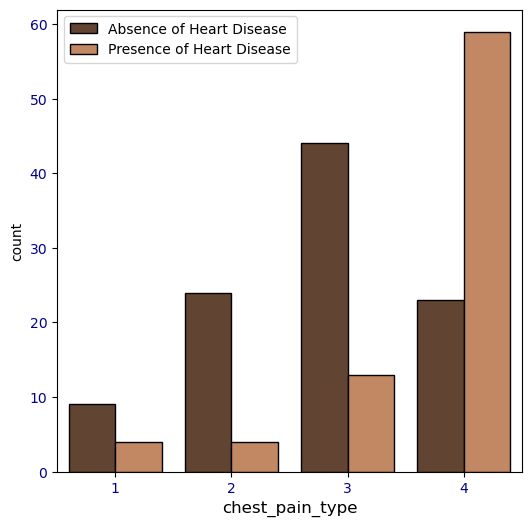

In [77]:
# chest pain type
plt.figure(figsize = (6,6))
sns.countplot(data = numtype,x = 'chest_pain_type',hue = 'heart_disease_present',edgecolor = 'black',palette = 'copper')
plt.xlabel('chest_pain_type',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Chest pain type is often measured using the Canadian Cardiovascular Society (CCS) classification for angina pectoris:
- **Class I:** Angina only with strenuous exertion.
- **Class II:** Slight limitation of ordinary activity (e.g., walking or climbing stairs rapidly).
- **Class III:** Marked limitation of ordinary physical activity (e.g., walking one or two blocks).
- **Class IV:** Inability to carry out any physical activity without discomfort; angina may occur at rest.

- In the dataset the people have a chest pain type of **class-4** where most of them have a presence of **heart disease** in them.
- Rest of the people who are of **class 1,2 and 3** chest pain type have less presence of **heart disease** in them. 

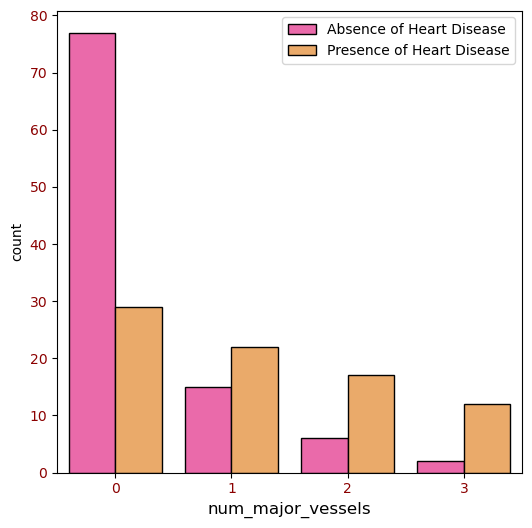

In [79]:
# num of major vessels
plt.figure(figsize = (6,6))
sns.countplot(data = numtype,x = 'num_major_vessels',hue = 'heart_disease_present',edgecolor = 'black',palette = 'spring')
plt.xlabel('num_major_vessels',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

The term "number of major vessels colored by fluoroscopy" refers to the identification and evaluation of these vessels during the angiography procedure to assess for the presence of stenosis (narrowing) or blockages.

- **0 Vessels:** Indicates no significant stenosis in the major coronary vessels.
- **1 Vessel:** Significant stenosis in one major coronary artery.
- **2 Vessels:** Significant stenosis in two major coronary arteries.
- **3 Vessels:** Significant stenosis in three major coronary arteries.

- The number of major vessels colored by fluoroscopy in coronary angiography is a key parameter in evaluating the extent of coronary artery disease, with higher numbers indicating more severe disease and guiding the management and therapeutic approach.
-  In our dataset we have more number of people with **0 major vessels** category indicating less presence of **heart disease** in them.
- But in contrast the people with **1,2 or 3 vessels** category have a high chance of presence of coronary heart disease in them. 

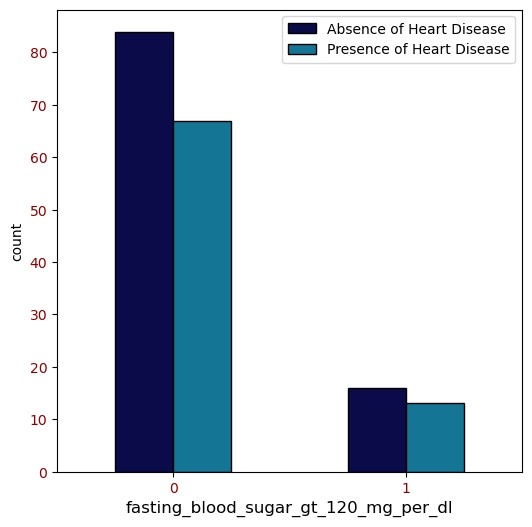

In [81]:
# fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize = (6,6))
sns.countplot(data = numtype,x = 'fasting_blood_sugar_gt_120_mg_per_dl',width = 0.5,hue = 'heart_disease_present',edgecolor = 'black',palette = 'ocean')
plt.xlabel('fasting_blood_sugar_gt_120_mg_per_dl',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

### Insights:
- A fasting blood glucose less than 100 is normal. 100-120 is called **"impaired fasting glucose"**, or  **pre-diabetes**.
- Here **1** represents the person is having fasting blood sugar greater than 120mg/dl and **0** represents the person is having fasting blood sugar less than 120mg/dl. 
- A person with a fasting blood sugar over 120, or a non-fasting blood sugar over 200, is diabetic.
- In our dataset we have more number of people whose **fasting blood sugar is less than 120mg/dl**, but also in that sample we are seeing a presence of **heart disease** in people.  

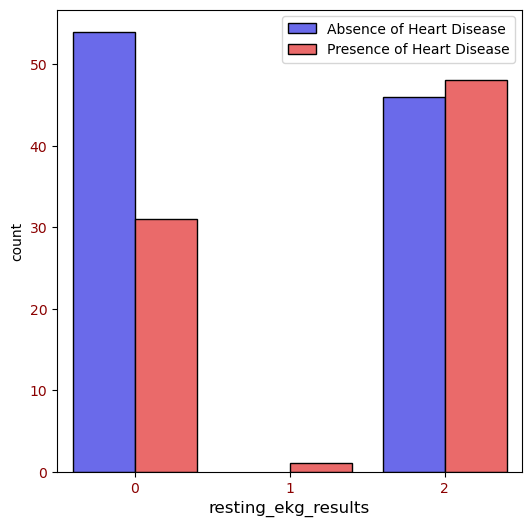

In [83]:
# resting ekg results
plt.figure(figsize = (6,6))
sns.countplot(data = numtype,x = 'resting_ekg_results',hue = 'heart_disease_present',edgecolor = 'black',palette = 'seismic')
plt.xlabel('resting_ekg_results',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

- **Resting_ekg_results :-** This is the standard type of EKG. It's done while we're lying down and resting. It can be done in our doctor's office, a clinic, or the hospital.
- **Value 0**: normal
- **Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- **Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria.

### Insights:-
- **Value - 2** class people have equal chance of presence and absence of heart disease in them.
- majority of the people in the **Value - 0** class has absence of heart-disease in them, but there are people with the presence of heart-disease among them.
- **Value - 1** in our dataset contains only **one data value** in our dataset which is not sufficient or not required for our analysis, so we will ignore that one value by taking only **Value-0** and **Value-2** for our analysis.


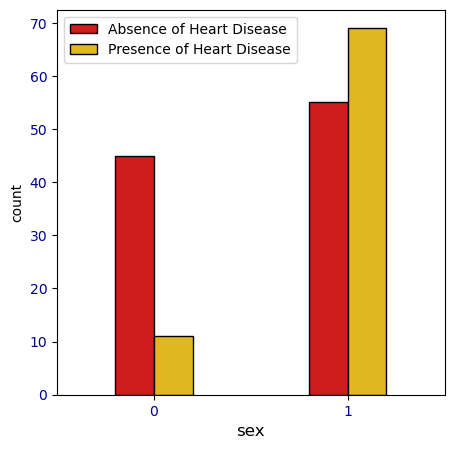

In [85]:
# sex (0 : female and  1 : male)
plt.figure(figsize = (5,5))
sns.countplot(data = numtype,x = 'sex',width = 0.4,hue = 'heart_disease_present',edgecolor = 'black',palette = 'hot')
plt.xlabel('sex',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

### Insights:
- Here **0** refers to **female** and **1** for **male**.
- Majority of the people in the feature/dataset are **males** and they have higher cases of presence of **Heart disease** in them.
- Females on the other hand have very few cases of **heart disease**. 

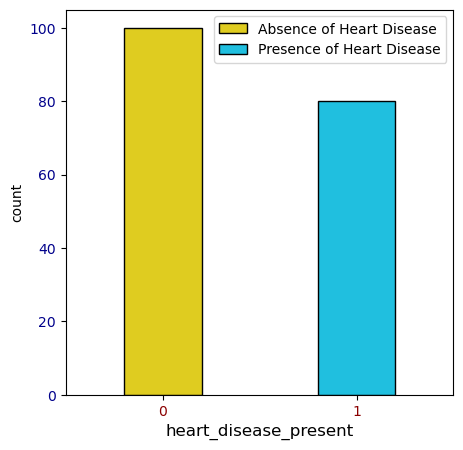

In [87]:
# Analysing our Dependent variable 'heart_disease_present'
plt.figure(figsize = (5,5))
sns.countplot(data = numtype,width = 0.4,x = 'heart_disease_present',edgecolor = 'black',palette = 'jet_r')
plt.xlabel('heart_disease_present',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

### Insights :
- **0** indicates **no heart disease** and **1** refers to the **presence of heart disease**. 
- Significant number of the people in the dataset have **no heart disease** at all.

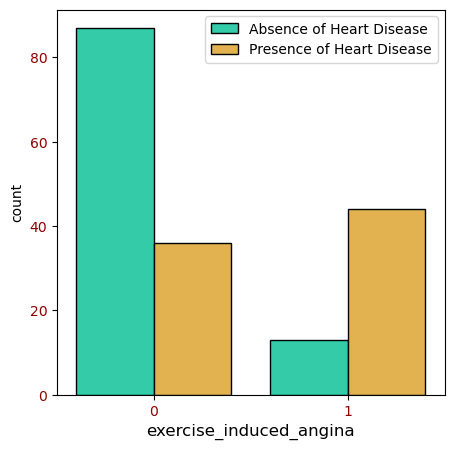

In [89]:
# excercise induced angina
plt.figure(figsize = (5,5))
sns.countplot(data = numtype,x = 'exercise_induced_angina',hue = 'heart_disease_present',edgecolor = 'black',palette = 'turbo')
plt.xlabel('exercise_induced_angina',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

**Excercise induced angina (Exertional angina)** :- It is a type of chest pain or discomfort that occurs when the heart muscle does not receive enough oxygen-rich blood during physical activity or exertion. This condition is a symptom of underlying **coronary artery disease (CAD)**, where the coronary arteries that supply blood to the heart muscle are narrowed or blocked.
- **0** indicates **False** and **1** indicates **True**.
- Majority of the people in the dataset do not have **excercise induced angina**, so they have less chance of getting a **heart disease**.
- But people who have **excercise induced angina** have higher chance of getting a **heart disease**.

### analysis for the independent continous numerical variables 

In [59]:
# grouping continous numerical datatype columns from a dataset
contcols = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']
contcols

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

In [61]:
contcols_len = len(contcols)
contcols_len

5

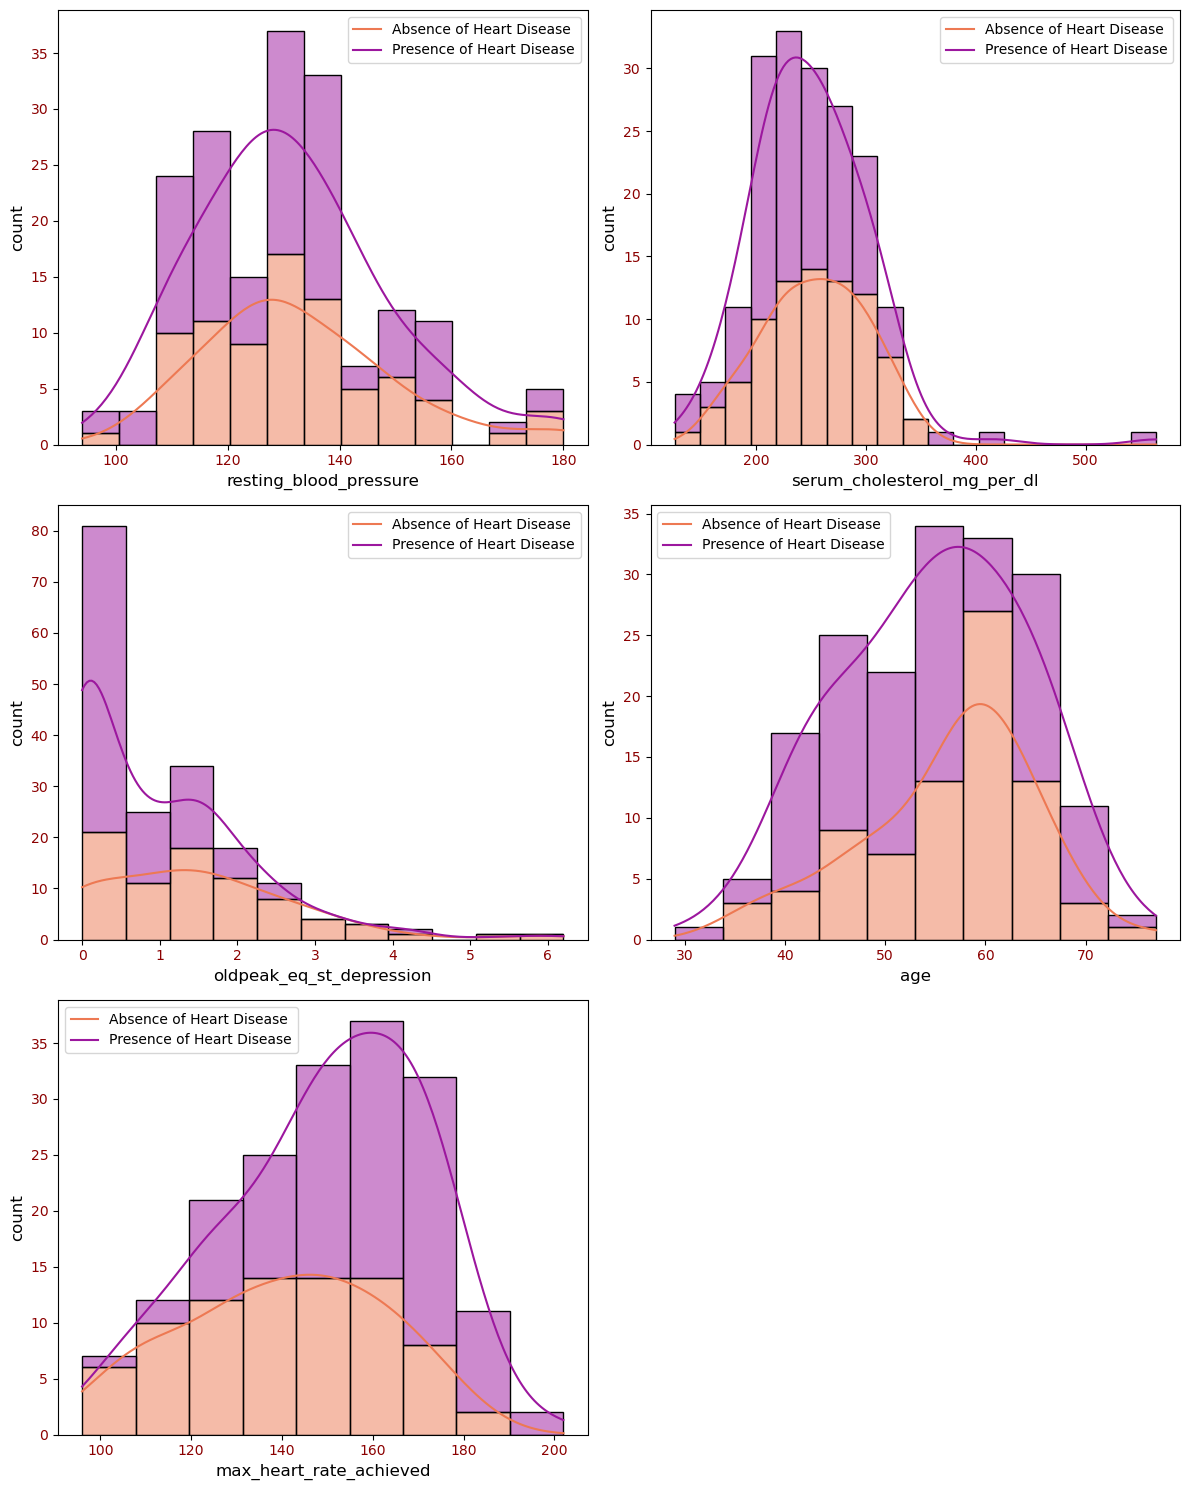

In [63]:
plt.figure(figsize = (12,15))
plot_num = 1
for col in contcols:
    if plot_num <= contcols_len:
        plt.subplot(3,2,plot_num)
        sns.histplot(data = data,x = col,hue = 'heart_disease_present',palette = 'plasma',kde = True,multiple = 'stack')
        plt.xlabel(col,color = 'black',fontsize = 12)
        plt.ylabel('count',color = 'black',fontsize = 12)
        plt.xticks(color = 'darkred')
        plt.yticks(color = 'darkred')
        plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
    plot_num += 1
plt.tight_layout()
plt.show()

- From the above datasetplots, specifically at the **age** plot we came to know that people with the **age** of around **60-65** have a higher chance of **presence** of **heart disease** in them.
- Also when **max_heart_rate_achieved** of the people starts to decrease then the **presence of heart disease** in them increases.

In [65]:
 ### Varifying the above insights by looking into the dataframe
data.loc[(data['age'] >= 60) & (data['age'] < 65),['age','heart_disease_present']]['heart_disease_present'].value_counts()

heart_disease_present
1    21
0    10
Name: count, dtype: int64

## Data Preprocessing

In [67]:
data[discreatecols]

,slope_of_peak_exercise_st_segment,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,1,2,0,0,2,1,0,0
1,2,3,0,0,0,0,0,0
2,1,4,3,0,2,1,1,1
3,1,4,0,0,0,1,0,1
4,3,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...
175,2,4,2,1,0,1,0,1
176,2,4,0,0,1,0,1,1
177,2,3,0,0,0,1,1,1
178,1,3,2,1,0,1,0,0


In [69]:
for col in data[discreatecols].columns:
    print(f'************* {col} ***********')
    print(data[col].value_counts())
    print('\n')

************* slope_of_peak_exercise_st_segment ***********
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64


************* chest_pain_type ***********
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64


************* num_major_vessels ***********
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64


************* fasting_blood_sugar_gt_120_mg_per_dl ***********
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64


************* resting_ekg_results ***********
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64


************* sex ***********
sex
1    124
0     56
Name: count, dtype: int64


************* exercise_induced_angina ***********
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64


************* heart_disease_present ***********
heart_disease_present
0    100
1     80
Name: count, dtype: int64




### Seperating the dependent variable

In [71]:
y = data['heart_disease_present'].copy()
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [73]:
data = data.drop(columns = 'heart_disease_present')
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [75]:
# Performing One-hot encoding for 'resting_ekg_results'
tp = pd.get_dummies(data['resting_ekg_results'],dtype = int,prefix = 'resting_ekg_results',prefix_sep = '_').drop(columns = 'resting_ekg_results_1')
tp
# we are removing "resting_ekg_results_1" because it has only one data value in its column.

,resting_ekg_results_0,resting_ekg_results_2
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
175,1,0
176,0,0
177,1,0
178,1,0


In [77]:
data = pd.concat([data,tp],axis = 1).drop(columns = 'resting_ekg_results')
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2
0,1,normal,128,2,0,0,308,0.0,1,45,170,0,0,1
1,2,normal,110,3,0,0,214,1.6,0,54,158,0,1,0
2,1,normal,125,4,3,0,304,0.0,1,77,162,1,0,1
3,1,reversible_defect,152,4,0,0,223,0.0,1,40,181,0,1,0
4,3,reversible_defect,178,1,0,0,270,4.2,1,59,145,0,0,1


In [79]:
data['num_major_vessels'].value_counts()

num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

In [81]:
# performing one-hot encoding for 'num_major_vessels'
tp = pd.get_dummies(data['num_major_vessels'],dtype = int,prefix = 'num_major_vessels',prefix_sep = '_')
tp

,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
175,0,0,1,0
176,1,0,0,0
177,1,0,0,0
178,0,0,1,0


In [83]:
tp = tp.drop(columns = 'num_major_vessels_3')
tp

,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
175,0,0,1
176,1,0,0
177,1,0,0
178,0,0,1


In [85]:
data  = pd.concat([data,tp],axis = 1).drop(columns = 'num_major_vessels')
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2
0,1,normal,128,2,0,308,0.0,1,45,170,0,0,1,1,0,0
1,2,normal,110,3,0,214,1.6,0,54,158,0,1,0,1,0,0
2,1,normal,125,4,0,304,0.0,1,77,162,1,0,1,0,0,0
3,1,reversible_defect,152,4,0,223,0.0,1,40,181,0,1,0,1,0,0
4,3,reversible_defect,178,1,0,270,4.2,1,59,145,0,0,1,1,0,0


In [87]:
data['chest_pain_type'].value_counts()

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

In [89]:
# Performing one-hot encoding for column 'chest_pain_type'
tp = pd.get_dummies(data['chest_pain_type'],dtype = int,prefix = 'chest_pain_type',prefix_sep = '_').drop(columns = 'chest_pain_type_1')
tp

,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
175,0,0,1
176,0,0,1
177,0,1,0
178,0,1,0


In [91]:
data = pd.concat([data,tp],axis = 1).drop(columns = 'chest_pain_type')
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4
0,1,normal,128,0,308,0.0,1,45,170,0,0,1,1,0,0,1,0,0
1,2,normal,110,0,214,1.6,0,54,158,0,1,0,1,0,0,0,1,0
2,1,normal,125,0,304,0.0,1,77,162,1,0,1,0,0,0,0,0,1
3,1,reversible_defect,152,0,223,0.0,1,40,181,0,1,0,1,0,0,0,0,1
4,3,reversible_defect,178,0,270,4.2,1,59,145,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,1,254,0.2,1,67,163,0,1,0,0,0,1,0,0,1
176,2,normal,180,0,327,3.4,0,55,117,1,0,0,1,0,0,0,0,1
177,2,reversible_defect,125,0,309,1.8,1,64,131,1,1,0,1,0,0,0,1,0
178,1,normal,124,1,255,0.0,1,48,175,0,1,0,0,0,1,0,1,0


In [93]:
# for slope_of_peak_exercise_st_segment
data['slope_of_peak_exercise_st_segment'].value_counts()

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64

In [95]:
# performing one-hot encoding for slope_of_peak_excercise_st_segment column
tp = pd.get_dummies(data = data['slope_of_peak_exercise_st_segment'],dtype = int,prefix = 'slope_of_peak_exercise_st_segment',prefix_sep = '_')#.drop(columns = 'slope_of_peak_exercise_st_segment_3')
tp

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
175,0,1,0
176,0,1,0
177,0,1,0
178,1,0,0


In [97]:
data = pd.concat([data,tp],axis = 1).drop(columns = 'slope_of_peak_exercise_st_segment')
data.head()

,thal,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,normal,128,0,308,0.0,1,45,170,0,0,1,1,0,0,1,0,0,1,0,0
1,normal,110,0,214,1.6,0,54,158,0,1,0,1,0,0,0,1,0,0,1,0
2,normal,125,0,304,0.0,1,77,162,1,0,1,0,0,0,0,0,1,1,0,0
3,reversible_defect,152,0,223,0.0,1,40,181,0,1,0,1,0,0,0,0,1,1,0,0
4,reversible_defect,178,0,270,4.2,1,59,145,0,0,1,1,0,0,0,0,0,0,0,1


In [99]:
#  for the only categorical column
data['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [101]:
# Performing one-hot encoding for 'thal' categorical column
tp = pd.get_dummies(data = data['thal'],prefix = 'thal',prefix_sep = '_',dtype = int)#.drop(columns = 'thal_fixed_defect')
tp

,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
175,0,0,1
176,0,1,0
177,0,0,1
178,0,1,0


In [103]:
data = pd.concat([data,tp],axis = 1).drop(columns = 'thal')
data

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2,...,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect
0,128,0,308,0.0,1,45,170,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,110,0,214,1.6,0,54,158,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,125,0,304,0.0,1,77,162,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,152,0,223,0.0,1,40,181,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,178,0,270,4.2,1,59,145,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,125,1,254,0.2,1,67,163,0,1,0,...,1,0,0,1,0,1,0,0,0,1
176,180,0,327,3.4,0,55,117,1,0,0,...,0,0,0,1,0,1,0,0,1,0
177,125,0,309,1.8,1,64,131,1,1,0,...,0,0,1,0,0,1,0,0,0,1
178,124,1,255,0.0,1,48,175,0,1,0,...,1,0,1,0,1,0,0,0,1,0


## Outlier Detection and Handling for continous numerical variable

In [106]:
data[contcols]

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145
...,...,...,...,...,...
175,125,254,0.2,67,163
176,180,327,3.4,55,117
177,125,309,1.8,64,131
178,124,255,0.0,48,175


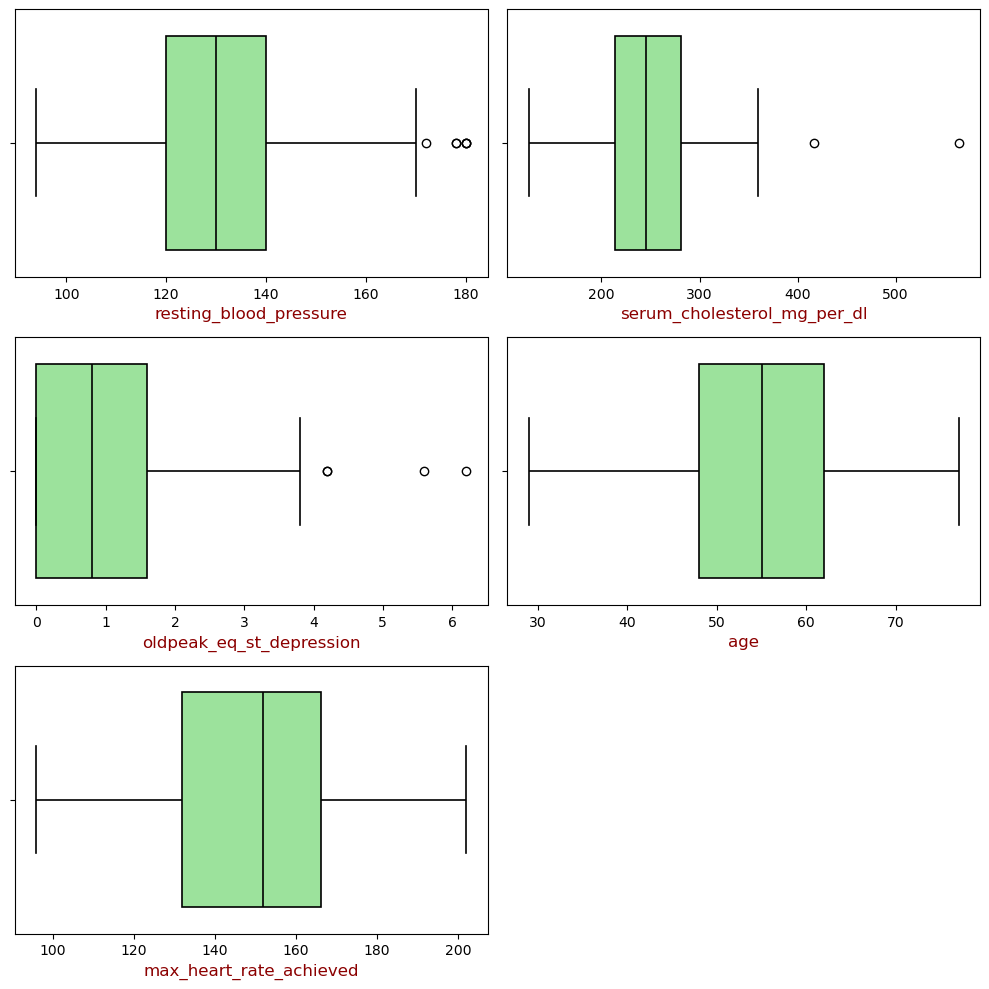

In [108]:
# Identifying outliers by plotting boxplot for each of the continous variable column.

plt.figure(figsize = (10,10))
plot_num = 1

for col in data[contcols].columns:
    if plot_num <= 5:
        plt.subplot(3,2,plot_num)
        sns.boxplot(data = data,x = col,color = 'lightgreen',linecolor = 'black',linewidth = 1.2)
        plt.xlabel(col,color = 'darkred',fontsize = 12)
        plt.xticks(color = 'black')
    plot_num += 1
plt.tight_layout()
plt.show()

### Insights :
- From the above box plots we can see that **age** and **max_heart_rate_achieved** columns have no outliers in them.
- But we can see outliers in the **resting_blood_pressure**,**serum_cholesterol_mg_per_dl** and **oldpeak_eq_st_depression** columns.

### Replacing Outliers present in the 3 columns mentioned above.

In [110]:
# For resting_blood_pressure
data['resting_blood_pressure'].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

In [112]:
# Detecting outliers using IQR
from scipy.stats import iqr
Q11 = data['resting_blood_pressure'].quantile(0.25)
Q31 = data['resting_blood_pressure'].quantile(0.75)
IQR1 = iqr(data['resting_blood_pressure'])
max1 = Q31 + (1.5*IQR1)
min1 = Q11 - (1.5*IQR1)
print('No of outliers less than min value : ',len(data.loc[data['resting_blood_pressure'] < min1]))
print('No of outliers greater than max value : ',len(data.loc[data['resting_blood_pressure'] > max1]))

No of outliers less than min value :  0
No of outliers greater than max value :  6


In [114]:
print(len(data['resting_blood_pressure']))

180


In [116]:
# percentage of outliers compared to the number of values in the column
print('Percentage of outliers which are more than maximum quantile value : ',(len(data.loc[data['resting_blood_pressure'] > max1])/len(data['resting_blood_pressure']))*100)

Percentage of outliers which are more than maximum quantile value :  3.3333333333333335


- As the percentage of Outliers are lesser than **5%**, we might be able to modify or change outliers in the column.

In [119]:
# Replacing outliers with the median value of the feature column
data.loc[data['resting_blood_pressure'] > max1,'resting_blood_pressure'] = data['resting_blood_pressure'].median()
data.loc[data['resting_blood_pressure'] > max1,'resting_blood_pressure']

Series([], Name: resting_blood_pressure, dtype: int64)

In [121]:
# For serum_cholesterol_mg_per_dl
data['serum_cholesterol_mg_per_dl'].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

In [123]:
# Detecting Outliers using IQR
from scipy.stats import iqr
Q12 = data.serum_cholesterol_mg_per_dl.quantile(0.25)
Q32 = data.serum_cholesterol_mg_per_dl.quantile(0.75)
IQR2 = iqr(data.serum_cholesterol_mg_per_dl)
max2 = Q32 + (1.5*IQR2)
min2 = Q12 - (1.5*IQR2)
print('No of outliers less than the minimum value : ',len(data.loc[data.serum_cholesterol_mg_per_dl < min2]))
print('No of outliers greater than the maximum value : ',len(data.loc[data.serum_cholesterol_mg_per_dl > max2]))

No of outliers less than the minimum value :  0
No of outliers greater than the maximum value :  2


In [125]:
# percentage of outliers compared to the number of values in the column
print('Percentage of outliers which are more than maximum quantile value : ',(len(data.loc[data['serum_cholesterol_mg_per_dl'] > max2])/len(data['serum_cholesterol_mg_per_dl']))*100)

Percentage of outliers which are more than maximum quantile value :  1.1111111111111112


- As the percentage of Outliers are lesser than **5%**, we might be able to modify or change outliers in the column.

In [128]:
# Replacing outliers with the median value of the feature column
data.loc[data.serum_cholesterol_mg_per_dl > max2,'serum_cholesterol_mg_per_dl'] = data.serum_cholesterol_mg_per_dl.median()
data.loc[data.serum_cholesterol_mg_per_dl > max2,'serum_cholesterol_mg_per_dl']

Series([], Name: serum_cholesterol_mg_per_dl, dtype: float64)

In [130]:
# For oldpeak_eq_st_depression
data['oldpeak_eq_st_depression'].describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak_eq_st_depression, dtype: float64

In [132]:
# Detecting Outliers using IQR
Q13 = data.oldpeak_eq_st_depression.quantile(0.25)
Q33 = data.oldpeak_eq_st_depression.quantile(0.75)
IQR3 = iqr(data.oldpeak_eq_st_depression)
max3 = Q33 + (1.5*IQR3)
min3 = Q13 - (1.5*IQR3)
print('No of Outliers less than min value : ',len(data.loc[data.oldpeak_eq_st_depression < min3]))
print('No of outliers greater than max value : ',len(data.loc[data.oldpeak_eq_st_depression > max3]))

No of Outliers less than min value :  0
No of outliers greater than max value :  4


In [134]:
# percentage of outliers compared to the number of values in the column
print('Percentage of outliers which are more than maximum quantile value : ',(len(data.loc[data.oldpeak_eq_st_depression > max3])/len(data.oldpeak_eq_st_depression)) * 100)

Percentage of outliers which are more than maximum quantile value :  2.2222222222222223


- As the percentage of outlier is less than **5%** we can modify or change the outlier in the dataset column

In [137]:
# Replacing oultiers with the median value of the column
data.loc[data.oldpeak_eq_st_depression > max3,'oldpeak_eq_st_depression'] = data.oldpeak_eq_st_depression.median()
data.loc[data.oldpeak_eq_st_depression > max3,'oldpeak_eq_st_depression']

Series([], Name: oldpeak_eq_st_depression, dtype: float64)

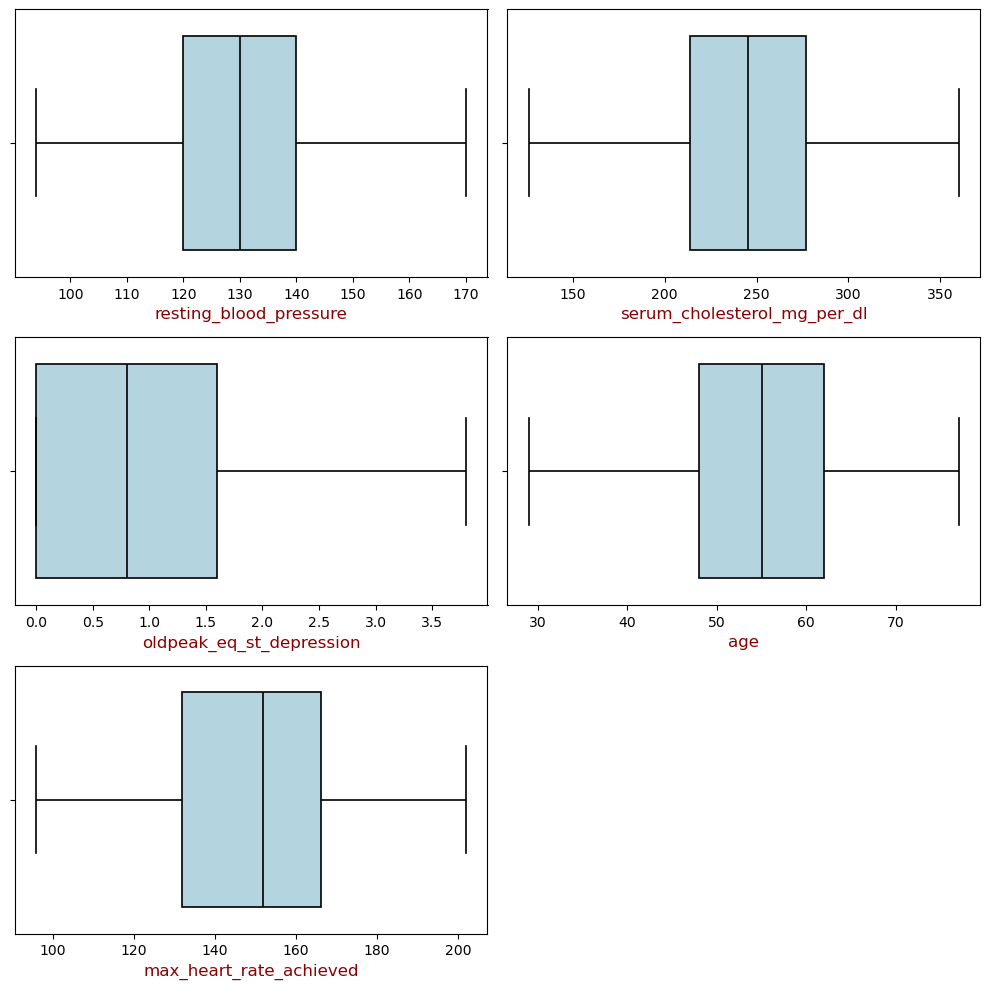

In [139]:
# Identifying outliers again by plotting boxplot for each of the continous variable column.

plt.figure(figsize = (10,10))
plot_num = 1

for col in data[contcols].columns:
    if plot_num <= 5:
        plt.subplot(3,2,plot_num)
        sns.boxplot(data = data,x = col,color = 'lightblue',linecolor = 'black',linewidth = 1.2)
        plt.xlabel(col,color = 'darkred',fontsize = 12)
        plt.xticks(color = 'black')
    plot_num += 1
plt.tight_layout()
plt.show()

- Now there are no outliers in the continous variable columns.

In [141]:
# Combining dependent variable for the data temporarily so that we can make correlation plot
tpdata = pd.concat([data,y.to_frame()],axis = 1)
tpdata.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,resting_ekg_results_2,...,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,heart_disease_present
0,128,0,308.0,0.0,1,45,170,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,110,0,214.0,1.6,0,54,158,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,125,0,304.0,0.0,1,77,162,1,0,1,...,0,0,1,1,0,0,0,1,0,1
3,152,0,223.0,0.0,1,40,181,0,1,0,...,0,0,1,1,0,0,0,0,1,1
4,130,0,270.0,0.8,1,59,145,0,0,1,...,0,0,0,0,0,1,0,0,1,0


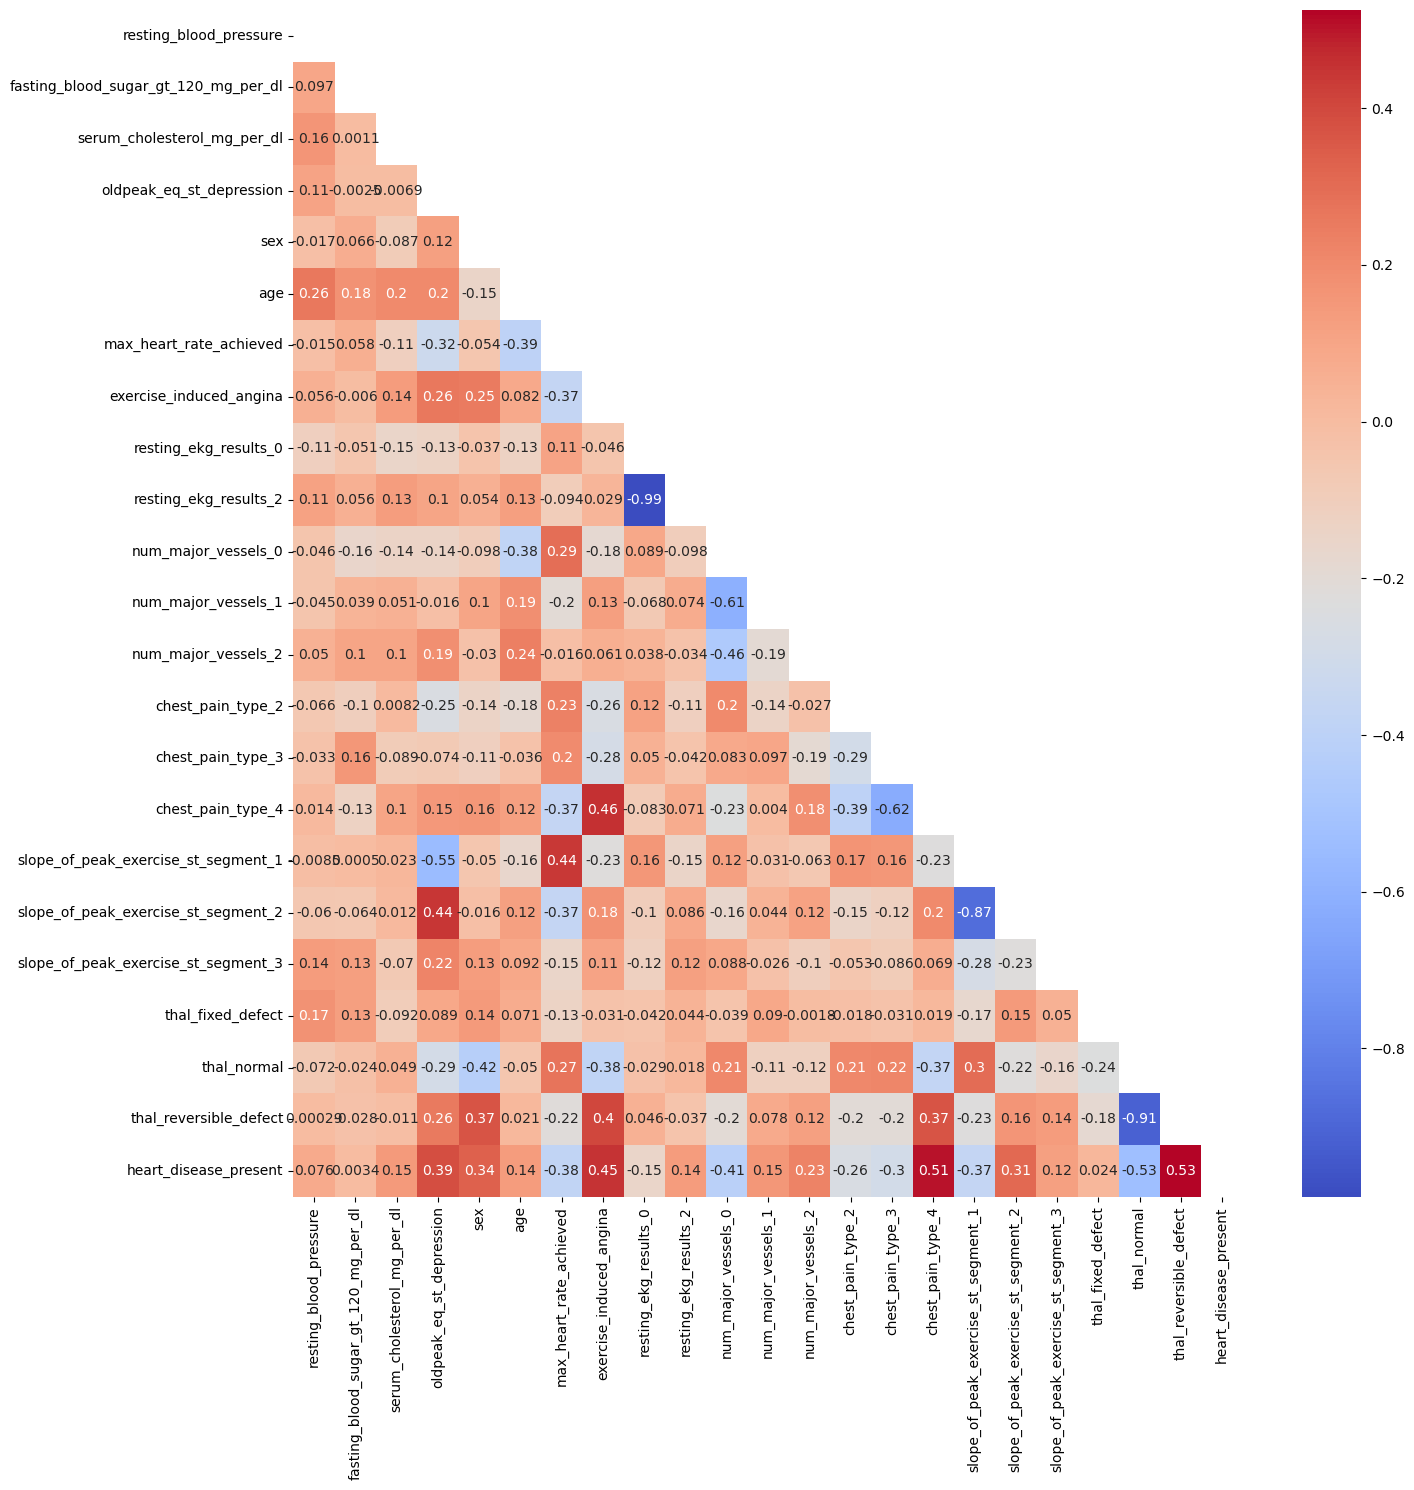

In [143]:
# plotting heatmap to look for correalations in the dataset
plt.figure(figsize = (15,15))
mymask = np.triu(np.ones_like(tpdata.corr()))
sns.heatmap(data = tpdata.corr(),linecolor = 'black',annot = True,cmap = 'coolwarm',mask = mymask)
plt.tight_layout()
plt.show()

### **Insights:**
- Based upon the correlation matrix above we got to know that **resting_ekg_results_0** is highly correlated with the **resting_ekg_results_2**. we will remove **resting_ekg_results_2**(we can remove either one of those 2 columns) from the dataset to prevent redundant features overtaking the learning process of the machine learning model.
- **thal_reversible_defect** is also highly correlated with the **thal_normal**, so we can remove any one feature column from the dataset, here we will drop **thal_reversible_defect** from the dataset.
- **slope_of_peak_excercise_st_segment_2** its correlation with the **slope_of_peak_excercise_st_segment_1** feature is pretty high too.thats why we remove **slope_of_peak_excercise_st_segment_2** from the dataset to prevent overfitting of the model by this redundant feature.

In [145]:
# Dropping the necessary columns from the dataset after going through the correlation process(pre-processing phase)
data.drop(columns = ['resting_ekg_results_2','thal_reversible_defect','slope_of_peak_exercise_st_segment_2'],inplace = True)
data.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal
0,128,0,308.0,0.0,1,45,170,0,0,1,0,0,1,0,0,1,0,0,1
1,110,0,214.0,1.6,0,54,158,0,1,1,0,0,0,1,0,0,0,0,1
2,125,0,304.0,0.0,1,77,162,1,0,0,0,0,0,0,1,1,0,0,1
3,152,0,223.0,0.0,1,40,181,0,1,1,0,0,0,0,1,1,0,0,0
4,130,0,270.0,0.8,1,59,145,0,0,1,0,0,0,0,0,0,1,0,0


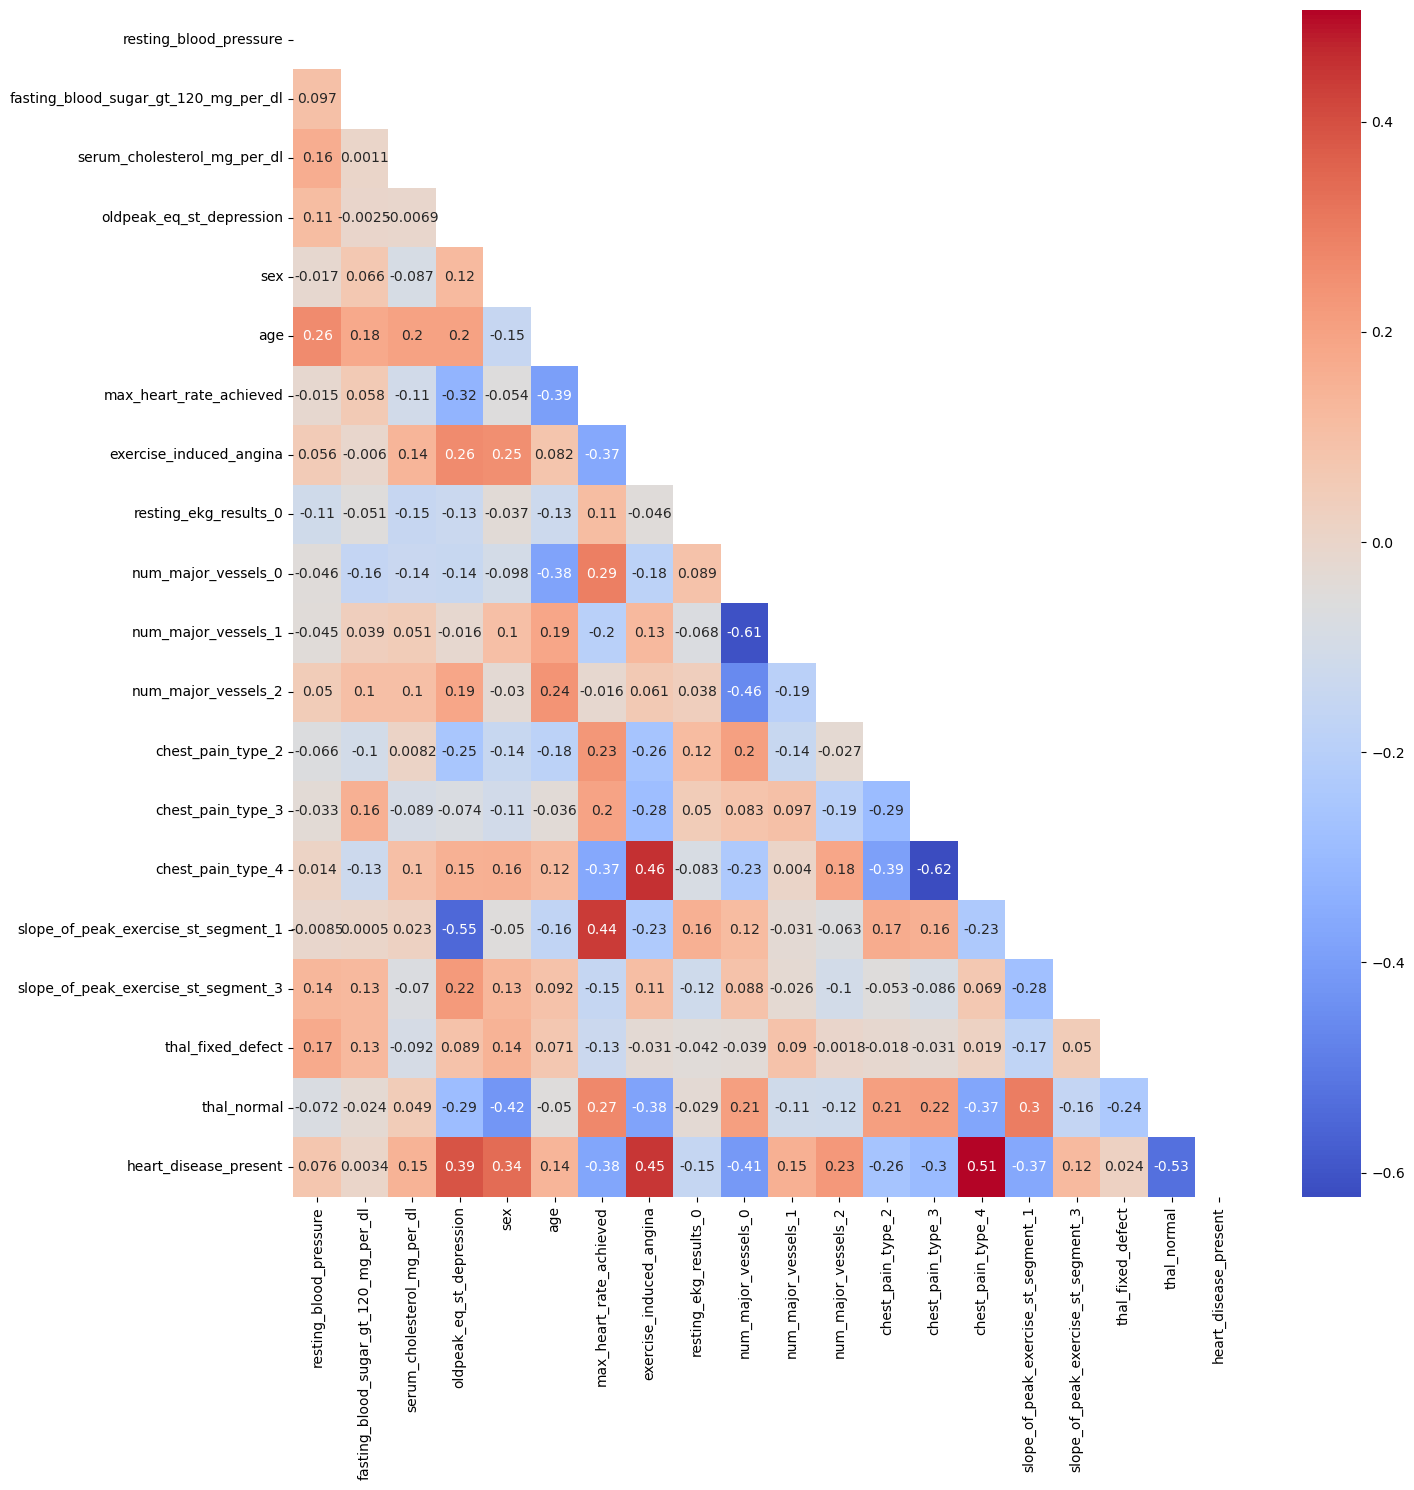

In [147]:
# checking again for any sort of correlation between feature columns using a heatmap
tpdata = pd.concat([data,y.to_frame()],axis = 1)
plt.figure(figsize = (15,15))
mymask = np.triu(np.ones_like(tpdata.corr()))
sns.heatmap(data = tpdata.corr(),linecolor = 'black',annot = True,cmap = 'coolwarm',mask = mymask)
plt.tight_layout()
plt.show()

In [149]:
data.shape

(180, 19)

In [151]:
data.duplicated().sum()

0

In [153]:
data.T.duplicated().sum()

0

 - There are no duplicated columns or rows in the dataset.

# **Model Creation**

In [155]:
X = data
X.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal
0,128,0,308.0,0.0,1,45,170,0,0,1,0,0,1,0,0,1,0,0,1
1,110,0,214.0,1.6,0,54,158,0,1,1,0,0,0,1,0,0,0,0,1
2,125,0,304.0,0.0,1,77,162,1,0,0,0,0,0,0,1,1,0,0,1
3,152,0,223.0,0.0,1,40,181,0,1,1,0,0,0,0,1,1,0,0,0
4,130,0,270.0,0.8,1,59,145,0,0,1,0,0,0,0,0,0,1,0,0


In [157]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [159]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle = True,stratify = y)

In [160]:
X_train

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal
139,130,0,219.0,0.0,1,44,188,0,0,1,0,0,1,0,0,1,0,0,1
0,128,0,308.0,0.0,1,45,170,0,0,1,0,0,1,0,0,1,0,0,1
169,110,0,211.0,1.8,1,64,144,1,0,1,0,0,0,0,0,0,0,0,1
65,126,0,282.0,0.0,1,35,156,1,0,1,0,0,0,0,1,1,0,0,0
98,155,0,269.0,0.8,0,65,148,0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,160,0,201.0,0.0,0,54,163,0,1,0,1,0,0,1,0,1,0,0,1
69,120,0,188.0,2.0,1,49,139,0,1,0,0,0,0,1,0,0,0,0,0
48,120,0,281.0,1.4,1,62,103,0,0,0,1,0,1,0,0,0,0,0,0
153,112,0,290.0,0.0,1,44,153,0,0,0,1,0,0,0,1,1,0,0,1


In [163]:
X_test

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,resting_ekg_results_0,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal
24,156,0,245.0,0.0,1,70,143,0,0,1,0,0,1,0,0,1,0,0,1
173,140,0,299.0,1.6,1,51,173,1,1,1,0,0,0,0,1,1,0,0,0
81,120,0,188.0,1.4,1,54,113,0,1,0,1,0,0,0,1,0,0,0,0
160,130,0,266.0,0.6,1,49,171,0,1,1,0,0,1,0,0,1,0,0,1
35,122,0,222.0,0.0,1,48,186,0,0,1,0,0,0,0,1,1,0,0,1
147,134,0,234.0,2.6,1,61,145,0,1,0,0,1,0,0,0,0,0,0,1
33,130,0,325.0,0.0,0,64,154,1,1,1,0,0,0,0,1,1,0,0,1
126,102,0,265.0,0.6,0,42,122,0,0,1,0,0,0,0,1,0,0,0,1
4,130,0,270.0,0.8,1,59,145,0,0,1,0,0,0,0,0,0,1,0,0
57,120,0,267.0,1.8,1,62,99,1,1,0,0,1,0,0,1,0,0,0,0


In [165]:
y_train

139    0
0      0
169    0
65     1
98     0
      ..
179    0
69     1
48     1
153    1
60     0
Name: heart_disease_present, Length: 144, dtype: int64

In [167]:
y_test

24     0
173    1
81     1
160    0
35     0
147    1
33     0
126    0
4      0
57     1
150    0
78     1
151    0
79     1
145    0
103    0
90     0
15     1
106    0
31     1
93     1
8      1
176    1
117    1
1      0
37     0
63     0
92     0
83     1
141    0
14     1
66     1
163    1
122    0
44     0
164    0
Name: heart_disease_present, dtype: int64

In [169]:
# Scaling the dataset for the purpose of optimising the results of some of the algorithms
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [171]:
X_train_sc

array([[ 0.03964558, -0.49130368, -0.57481697, ..., -0.25819889,
        -0.22604179,  0.8819171 ],
       [-0.09791981, -0.49130368,  1.41730155, ..., -0.25819889,
        -0.22604179,  0.8819171 ],
       [-1.33600831, -0.49130368, -0.7538838 , ..., -0.25819889,
        -0.22604179,  0.8819171 ],
       ...,
       [-0.64818136, -0.49130368,  0.81295099, ..., -0.25819889,
        -0.22604179, -1.13389342],
       [-1.19844292, -0.49130368,  1.01440118, ..., -0.25819889,
        -0.22604179,  0.8819171 ],
       [-0.99209484, -0.49130368,  0.01834192, ..., -0.25819889,
        -0.22604179, -1.13389342]])

In [173]:
X_test_sc

array([[ 1.82799564, -0.49130368,  0.00715024, -1.00982262,  0.66332496,
         1.57284171, -0.31943154, -0.68511879, -0.97259753,  0.85728628,
        -0.54524976, -0.36586646,  2.35487888, -0.74053163, -0.86953871,
         0.90707486, -0.25819889, -0.22604179,  0.8819171 ],
       [ 0.72747252, -0.49130368,  1.21585136,  0.85745773,  0.66332496,
        -0.38498127,  1.04820399,  1.4596009 ,  1.02817453,  0.85728628,
        -0.54524976, -0.36586646, -0.42465029, -0.74053163,  1.15003506,
         0.90707486, -0.25819889, -0.22604179, -1.13389342],
       [-0.64818136, -0.49130368, -1.26870095,  0.62404769,  0.66332496,
        -0.07585133, -1.68706707, -0.68511879,  1.02817453, -1.16647149,
         1.83402191, -0.36586646, -0.42465029, -0.74053163,  1.15003506,
        -1.10244484, -0.25819889, -0.22604179, -1.13389342],
       [ 0.03964558, -0.49130368,  0.47720068, -0.30959249,  0.66332496,
        -0.5910679 ,  0.95702829, -0.68511879,  1.02817453,  0.85728628,
        -0.545

In [175]:
y_train.value_counts()

heart_disease_present
0    80
1    64
Name: count, dtype: int64

In [177]:
y_test.value_counts()

heart_disease_present
0    20
1    16
Name: count, dtype: int64

- As seen from the above code cells, the class labels in both train and test sets have unequal data values **(0 - 100 & 1 - 80)**, So the dataset is termed to be an **Unbalanced/Imbalanced** dataset.

In [181]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_t,y_p):
    cm = pd.DataFrame(confusion_matrix(y_true = y_t,y_pred = y_p))
    plt.figure(figsize = (5,3))
    sns.heatmap(cm,annot = True,cmap = 'RdPu',linecolor = 'black',linewidths = 1.5)
    plt.xlabel('Actual Results',color = 'darkred')
    plt.ylabel('Predicted Results',color = 'darkred')
    plt.title('Confusion matrix',color = 'black')
    plt.xticks(color = 'black')
    plt.yticks(color = 'black')
    plt.show()

In [183]:
from sklearn.metrics import classification_report
def class_report(y_t,y_p):
    print(classification_report(y_true = y_t,y_pred = y_p))

In [185]:
from sklearn.metrics import roc_curve,roc_auc_score

def plot_roc_curve(fpr,tpr,auc,model_name,mycolor = 'black'):
    if mycolor == 'red' or mycolor == 'r':
        print('you cannot choose red as color for this roc plot, choose a different color other than red!!!')
    else:
        plt.figure(figsize = (8,8))
        plt.plot(fpr,tpr,color = mycolor,lw = 2,marker = 'o',markersize = 5,markerfacecolor = 'white',markeredgecolor = mycolor,\
                 label = f'ROC Curve for {model_name} having AUC score of {auc:.2f}')
        plt.plot((0,1),(0,1),color = 'red',lw = 2,linestyle = 'dashed')
        plt.xlabel('False Positive Rate',color = 'darkblue')
        plt.ylabel('True Positive Rate',color = 'darkred')
        plt.xticks(color = 'black')
        plt.yticks(color = 'black')
        plt.xlim([-0.1,1])
        plt.ylim([0,1.1])
        plt.title('Receiver Operating Characteristic (ROC)',color = 'black',fontsize= 12)
        plt.legend()
        plt.show()

In [299]:
# Cross validation for the model
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline


def perform_cross_validation(model,name = 'Model'):
    pipeline = Pipeline(steps = [
        ('scaler',StandardScaler()),
        (f'{name}',model)
    ])
    
    skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)
    cvs = cross_val_score(estimator = pipeline,X = X,y = y,scoring = 'f1',cv = skf,n_jobs = -1,verbose = 1,error_score = 'raise') 
    # here we are using f1-score as the scoring criteria
    print('Cross validation scores for each model : ',cvs)
    print('Mean of the f1 scores from the cross validation test : ',np.mean(cvs))
    print('Standard deviation of the f1 scores from the cross validation test : ',np.std(cvs))

## **KNN(K-Nearest-Neighbors) Classifier**

In [189]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [191]:
y_pred_knn = knn.predict(X_test_sc)
y_pred_knn

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [193]:
y_prob_knn = knn.predict_proba(X_test_sc)[:,1]
y_prob_knn

array([0.4, 0.4, 0.8, 0. , 0.2, 0.6, 0.8, 0.2, 0.6, 0.8, 0.2, 1. , 0.6,
       1. , 0.2, 0. , 0. , 0.8, 0.2, 1. , 1. , 1. , 0.8, 0.6, 0. , 0. ,
       0. , 0. , 1. , 0.2, 0.6, 0.8, 1. , 0.4, 0. , 0.6])

In [195]:
class_report(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



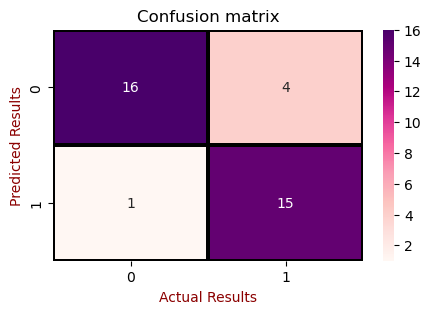

In [197]:
plot_confusion_matrix(y_test,y_pred_knn)

In [302]:
# Cross Validating the model
knn = KNeighborsClassifier()
perform_cross_validation(knn,'knn') # it is a function created just to reduce typing the same code again and again

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.7s remaining:    3.1s


Cross validation scores for each model :  [0.82352941 0.85714286 0.71428571 0.875      0.875      0.58823529
 0.8        0.73684211 0.8        0.85714286]
Mean of the f1 scores from the cross validation test :  0.7927178239716939
Standard deviation of the f1 scores from the cross validation test :  0.08601400681654026


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


In [201]:
# Performing Hyperparameter tuning for the KNN classifier model
from sklearn.model_selection import GridSearchCV,StratifiedKFold

knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)

knn_params = {
    'n_neighbors' : range(1,20),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kde_tree','brute'],
    'metric':['minkowski','manhattan','euclidean'],
    'p':[1,2],
    'leaf_size':[20,30,40,50,60]
}

gscv = GridSearchCV(estimator = knn,cv = skf,scoring = 'f1',param_grid = knn_params,n_jobs = -1,verbose = 1)
gscv.fit(X_train_sc,y_train)

gscv_params = gscv.best_params_
print('Best paramaters from the grid search are : ',gscv_params)
print('Best estimators from the grid search are :',gscv.best_estimator_)


Fitting 10 folds for each of 4560 candidates, totalling 45600 fits
Best paramaters from the grid search are :  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best estimators from the grid search are : KNeighborsClassifier(leaf_size=20, n_neighbors=11)


In [203]:
# Evaluating our model with the grid search cv results

knn = KNeighborsClassifier(algorithm = gscv_params['algorithm'],leaf_size = gscv_params['leaf_size'],metric = gscv_params['metric'],\
                            n_neighbors = gscv_params['n_neighbors'],p = gscv_params['p'],weights = gscv_params['weights'] )
knn.fit(X_train_sc,y_train)
y_pred_knn1 = knn.predict(X_test_sc)
y_prob_knn1 = knn.predict_proba(X_test_sc)[:,1]

y_pred_knn1

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [205]:
# evaluating our model using suitable metrics
class_report(y_test,y_pred_knn1)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.76      1.00      0.86        16

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [207]:
y_test.value_counts()

heart_disease_present
0    20
1    16
Name: count, dtype: int64

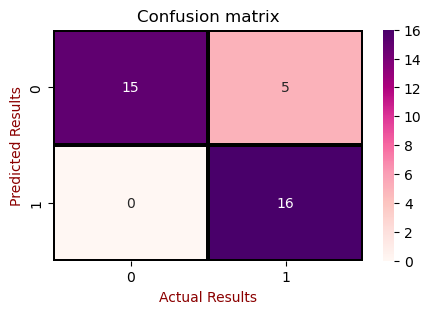

In [209]:
plot_confusion_matrix(y_test,y_pred_knn1)

In [211]:
# Cross validating our model again
knn1 = KNeighborsClassifier(algorithm = gscv_params['algorithm'],
                            leaf_size = gscv_params['leaf_size'],
                            metric = gscv_params['metric'],
                            n_neighbors = gscv_params['n_neighbors'],
                            p = gscv_params['p'],
                            weights = gscv_params['weights']
                           )

perform_cross_validation(knn1,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


Cross validation scores for each model :  [0.75       0.93333333 0.8        0.82352941 0.875      0.75
 0.75       0.82352941 0.8        0.66666667]
Mean of the f1 scores from the cross validation test :  0.7972058823529411
Standard deviation of the f1 scores from the cross validation test :  0.07050514240627109


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


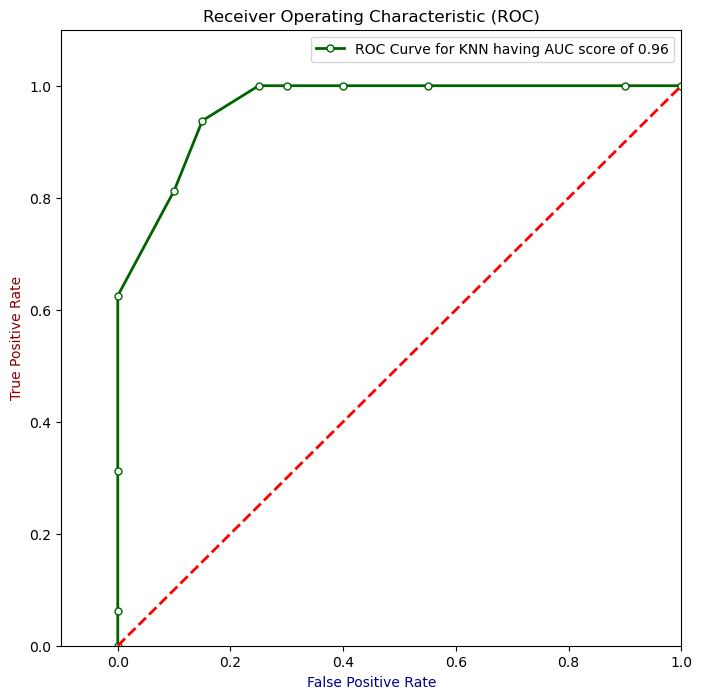

fpr :  [0.   0.   0.   0.   0.1  0.15 0.25 0.3  0.4  0.55 0.9  1.  ]
tpr :  [0.     0.0625 0.3125 0.625  0.8125 0.9375 1.     1.     1.     1.
 1.     1.    ]
threshold :  [       inf 1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.18181818 0.09090909 0.        ]


In [213]:
# plotting ROC-curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_prob_knn1)
auc = roc_auc_score(y_true = y_test,y_score = y_prob_knn1)
plot_roc_curve(fpr,tpr,auc,'KNN','darkgreen')
print('fpr : ',fpr)
print('tpr : ',tpr)
print('threshold : ',threshold)

## **Decision Tree Classifier**

In [227]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_sc,y_train)

DecisionTreeClassifier(random_state=42)

In [229]:
y_pred_dtc = dtc.predict(X_test_sc)
y_pred_dtc

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [231]:
# classification_report
class_report(y_test,y_pred_dtc)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.75      0.75      0.75        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



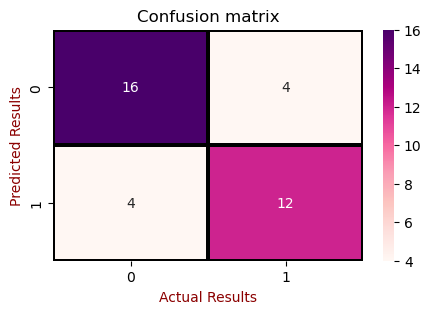

In [233]:
# confusion matrix
plot_confusion_matrix(y_test,y_pred_dtc)

In [304]:
# Cross validating the model
dtc = DecisionTreeClassifier(random_state = 42)
perform_cross_validation(dtc,'dtc')

Cross validation scores for each model :  [0.77777778 0.88888889 0.66666667 0.625      0.8        0.57142857
 0.85714286 0.82352941 0.66666667 0.57142857]
Mean of the f1 scores from the cross validation test :  0.7248529411764706
Standard deviation of the f1 scores from the cross validation test :  0.11243377964139163


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [306]:
# Performing hyperparameter tuning for the Decision Tree Classifier Model
from sklearn.model_selection import GridSearchCV,StratifiedKFold

skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)

dtc = DecisionTreeClassifier(random_state = 42)

dtc_param_grid = {
    'max_depth':[5,8,10,15,20,25],
    'min_samples_split':[3,5,8,10,15,20,30,35],
    'min_samples_leaf':[3,4,6,8,10,12,20,25],
    'criterion':['gini','entropy'],
    'max_features':[None,'sqrt','log2',10],
    'max_leaf_nodes':[None,5,10,12,15,20]
}

gscv = GridSearchCV(estimator = dtc,scoring = 'f1',cv = skf,n_jobs = -1,verbose = 1,param_grid = dtc_param_grid)
gscv.fit(X_train_sc,y_train)

best_params = gscv.best_params_
print('Best parameters from the grid search model : ',best_params)
print('Best Estimator from the grid search model : ',gscv.best_estimator_)

Fitting 10 folds for each of 18432 candidates, totalling 184320 fits
Best parameters from the grid search model :  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Estimator from the grid search model :  DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=10,
                       random_state=42)


In [308]:
# Evaluating our model with the grid search cv results
dtc1 = DecisionTreeClassifier(
                              random_state = 42,
                              max_depth = best_params['max_depth'],
                              criterion = best_params['criterion'],
                              max_features = best_params['max_features'],
                              max_leaf_nodes = best_params['max_leaf_nodes'],
                              min_samples_leaf = best_params['min_samples_leaf'],
                              min_samples_split = best_params['min_samples_split']
                             )
dtc1.fit(X_train_sc,y_train)
y_pred_dtc1 = dtc1.predict(X_test_sc)
y_prob_dtc1 = dtc1.predict_proba(X_test_sc)[:,1] # used for plotting ROC and AUC curve
y_pred_dtc1

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [310]:
# classification report
class_report(y_test,y_pred_dtc1)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.74      0.88      0.80        16

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



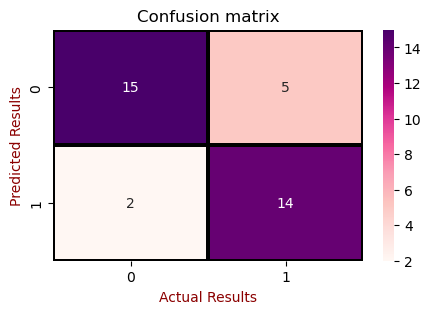

In [312]:
# confusion matrix
plot_confusion_matrix(y_test,y_pred_dtc1)

In [314]:
# cross validating the model
dtc1 = DecisionTreeClassifier(
                              random_state = 42,
                              max_depth = best_params['max_depth'],
                              criterion = best_params['criterion'],
                              max_features = best_params['max_features'],
                              max_leaf_nodes = best_params['max_leaf_nodes'],
                              min_samples_leaf = best_params['min_samples_leaf'],
                              min_samples_split = best_params['min_samples_split']
                            )

perform_cross_validation(dtc1,'dtc')

Cross validation scores for each model :  [0.66666667 0.94117647 0.75       0.8        0.875      0.42857143
 0.8        0.8        0.66666667 0.75      ]
Mean of the f1 scores from the cross validation test :  0.7478081232492998
Standard deviation of the f1 scores from the cross validation test :  0.13297767297150787


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


fpr :  [0.   0.05 0.05 0.25 0.3  0.4  0.55 1.  ]
tpr :  [0.     0.75   0.875  0.875  0.875  0.9375 1.     1.    ]
thresholds :  [       inf 1.         0.85714286 0.66666667 0.375      0.33333333
 0.28571429 0.        ]


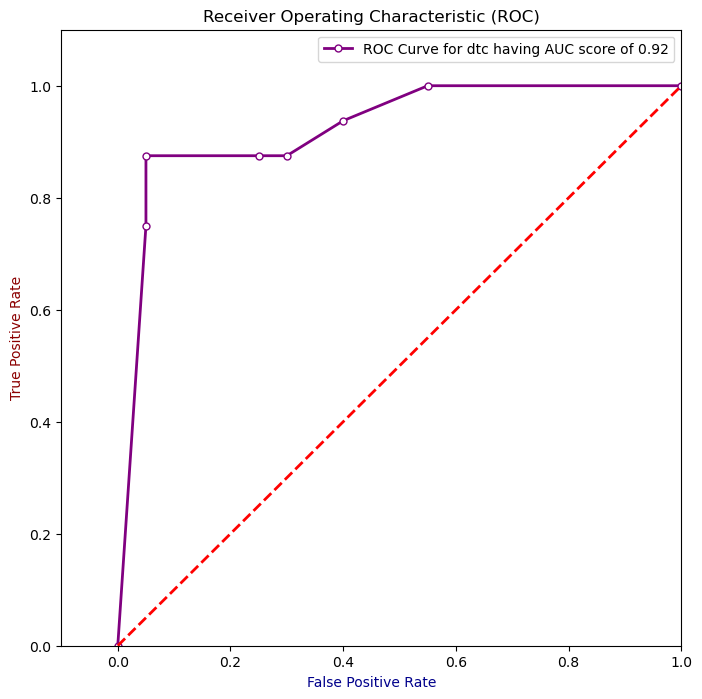

In [316]:
# plotting ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_prob_dtc1)
auc = roc_auc_score(y_true = y_test,y_score = y_prob_dtc1)
print('fpr : ',fpr)
print('tpr : ',tpr)
print('thresholds : ',threshold)
plot_roc_curve(fpr,tpr,auc,'dtc','purple')

## **Support Vector Machines (Classifier)**

In [318]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc,y_train)

SVC()

In [321]:
y_pred_svc = svc.predict(X_test_sc)
y_pred_svc

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [323]:
class_report(y_test,y_pred_svc)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



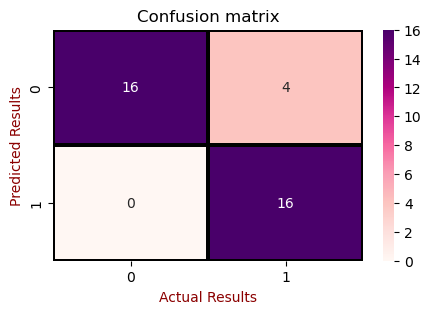

In [325]:
plot_confusion_matrix(y_test,y_pred_svc)

In [327]:
# Cross validating our model
svc = SVC()
perform_cross_validation(svc,'svc')

Cross validation scores for each model :  [0.93333333 0.875      0.8        0.77777778 1.         0.66666667
 0.82352941 0.77777778 0.8        0.76923077]
Mean of the f1 scores from the cross validation test :  0.8223315736551031
Standard deviation of the f1 scores from the cross validation test :  0.08870264755774404


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [329]:
# Performing Hyperparameter tuning for the SVC model
from sklearn.model_selection import GridSearchCV,StratifiedKFold
svc = SVC(random_state = 42) # we can specify random_state only when probability = True

svc_param_grid = {
    'C' : [0.1,0.2,0.5,1.0,3.0,10.0,20.0],
    'kernel':['rbf','poly','sigmoid','linear'],
    'gamma':[0.001,0.01,1,5,10,'auto','scale'],
    'degree' : [1,2,3,4,5],
    'coef0':[0.0,0.1,0.5,1]
}

skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)
gscv = GridSearchCV(estimator = svc,scoring = 'f1',cv = skf,n_jobs = -1,verbose = 1,param_grid =  svc_param_grid)
gscv.fit(X_train_sc,y_train)
best_params = gscv.best_params_
print('Best parameters from the grid search model : ',best_params)
print('Best estimator from the grid search model : ',gscv.best_estimator_)

Fitting 10 folds for each of 3920 candidates, totalling 39200 fits
Best parameters from the grid search model :  {'C': 0.1, 'coef0': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best estimator from the grid search model :  SVC(C=0.1, coef0=0.1, degree=1, gamma='auto', kernel='sigmoid', random_state=42)


In [331]:
# Evaluating our model with the grid search results
svc1 = SVC(C= best_params['C'],kernel = best_params['kernel'],gamma = best_params['gamma'],degree = best_params['degree'],coef0 = best_params['coef0'],\
          probability = True,random_state = 42)
svc1.fit(X_train_sc,y_train)

SVC(C=0.1, coef0=0.1, degree=1, gamma='auto', kernel='sigmoid',
    probability=True, random_state=42)

In [333]:
y_pred_svc1 = svc1.predict(X_test_sc)
y_prob_svc1 = svc1.predict_proba(X_test_sc)[:,1] 
y_pred_svc1

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [335]:
class_report(y_test,y_pred_svc1)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



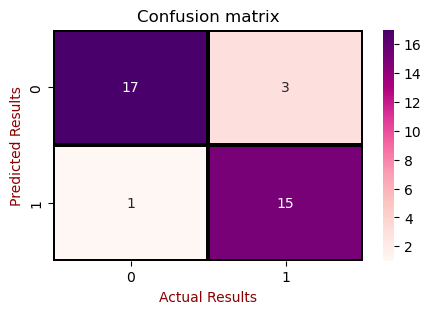

In [337]:
plot_confusion_matrix(y_test,y_pred_svc1)

In [339]:
# Cross validating our model
svc1 = SVC(C= best_params['C'],kernel = best_params['kernel'],gamma = best_params['gamma'],degree = best_params['degree'],coef0 = best_params['coef0'],\
          probability = True,random_state = 42)
perform_cross_validation(svc1,'svc')

Cross validation scores for each model :  [0.93333333 0.93333333 0.8        0.70588235 0.875      0.66666667
 0.82352941 0.82352941 0.8        0.76923077]
Mean of the f1 scores from the cross validation test :  0.813050527903469
Standard deviation of the f1 scores from the cross validation test :  0.08256349921953811


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


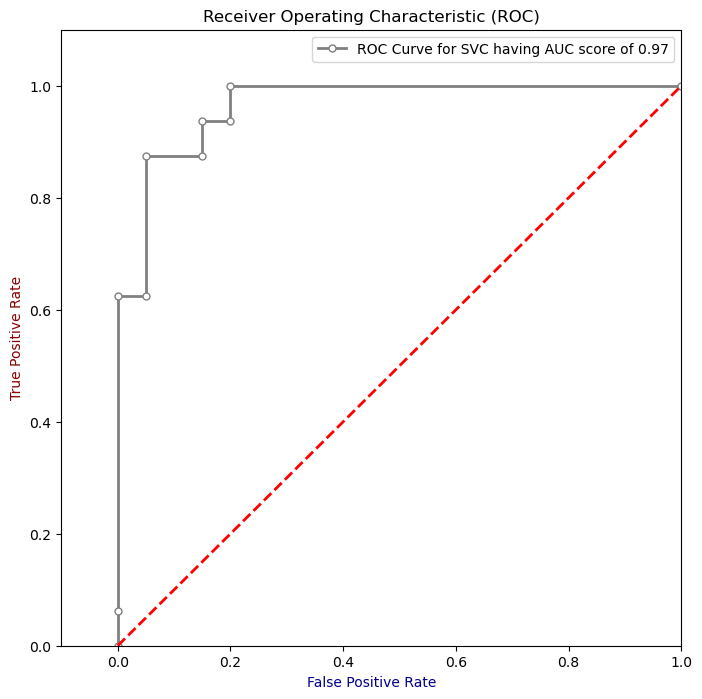

In [341]:
# plot ROC and AUC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_prob_svc1)
auc = roc_auc_score(y_true = y_test,y_score = y_prob_svc1)

plot_roc_curve(fpr,tpr,auc,'SVC','grey')

## **Random Forrest Classifier**

In [344]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_sc,y_train)

RandomForestClassifier(random_state=42)

In [346]:
y_pred_rfc = rfc.predict(X_test_sc)
y_pred_rfc

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [348]:
class_report(y_test,y_pred_rfc)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



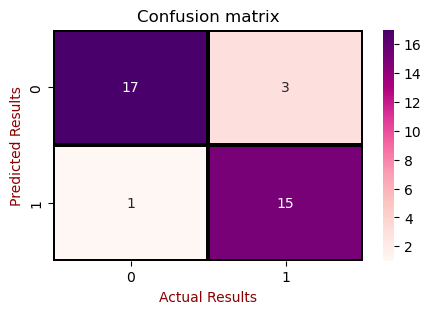

In [350]:
plot_confusion_matrix(y_test,y_pred_rfc)

In [352]:
# Cross validating our model
rfc = RandomForestClassifier(random_state = 42)
perform_cross_validation(rfc,'rfc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s


Cross validation scores for each model :  [0.93333333 0.93333333 0.71428571 0.66666667 1.         0.66666667
 0.82352941 0.88888889 0.8        0.76923077]
Mean of the f1 scores from the cross validation test :  0.8195934784170078
Standard deviation of the f1 scores from the cross validation test :  0.11136454519723425


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [354]:
# Performing Hyperparameter tuning for the random forest classifier model

from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

rfc = RandomForestClassifier(random_state = 42,n_jobs = -1)

rfc_param_grid = {
    'n_estimators':[50,60,100,150],
    'criterion':['gini','entropy'],
    'max_depth':[None,5,8,10,20,30],
    'min_samples_split':[1,2,3,5,10,20],
    'min_samples_leaf':[1,3,6,10,20],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}

skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)
# gscv = GridSearchCV(estimator = rfc,scoring = 'f1',cv= skf,n_jobs = -1,verbose = 1,param_grid = rfc_param_grid)

rscv = RandomizedSearchCV(estimator = rfc,n_iter = 100,scoring = 'f1',cv= skf,n_jobs = -1,verbose = 1,param_distributions = rfc_param_grid,random_state = 42)
rscv.fit(X_train_sc,y_train)
# gscv.fit(X_train_sc,y_train)
# best_params = gscv.best_params_
best_params = rscv.best_params_
print('Best parameters from the search cv model are : ',best_params)
print('Best Estimator from the search cv model are : ',rscv.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from the search cv model are :  {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Best Estimator from the search cv model are :  RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=150, n_jobs=-1, random_state=42)


In [357]:
# Evaluating our model with the randomized search results
rfc1 = RandomForestClassifier(n_estimators = best_params['n_estimators'],min_samples_split = best_params['min_samples_split'],\
                             min_samples_leaf = best_params['min_samples_leaf'],max_features = best_params['max_features'],max_depth = best_params['max_depth'],criterion = best_params['criterion'],\
                             bootstrap = best_params['bootstrap'],random_state = 42)
rfc1.fit(X_train_sc,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=150, random_state=42)

In [359]:
y_pred_rfc1 = rfc1.predict(X_test_sc)
y_prob_rfc1 = rfc1.predict_proba(X_test_sc)[:,1]
y_pred_rfc1

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [361]:
class_report(y_test,y_pred_rfc1)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



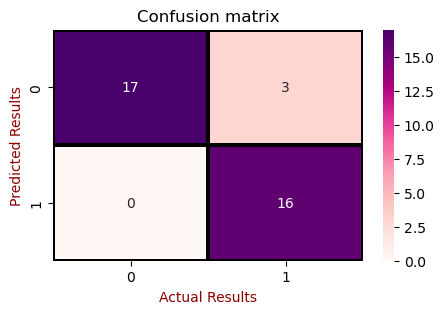

In [363]:
plot_confusion_matrix(y_test,y_pred_rfc1)

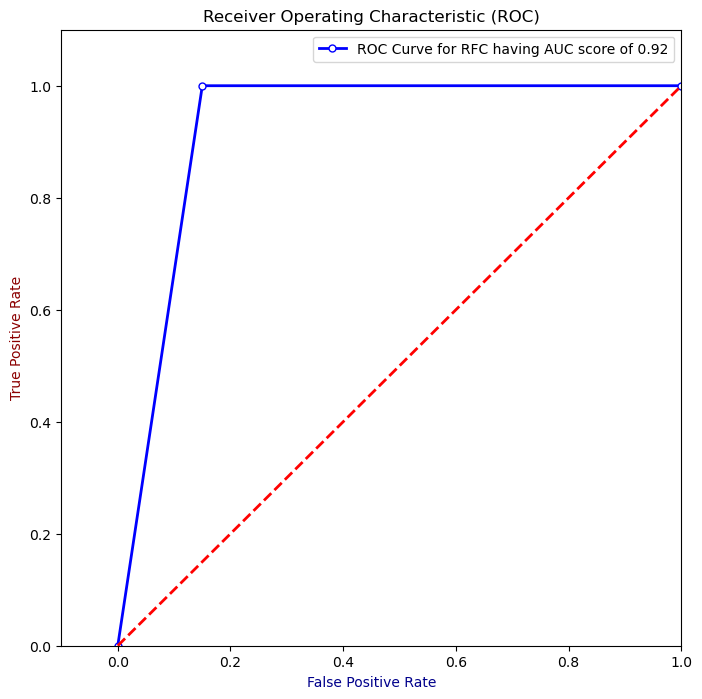

thresholds :  [inf  1.  0.]
fpr :  [0.   0.15 1.  ]
tpr :  [0. 1. 1.]


In [365]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_pred_rfc1)
auc = roc_auc_score(y_true = y_test,y_score = y_pred_rfc1)
plot_roc_curve(fpr,tpr,auc,'RFC','blue')
print('thresholds : ',threshold)
print('fpr : ',fpr)
print('tpr : ',tpr)

In [367]:
# cross validating the model after hyperparameter tuning
perform_cross_validation(rfc1,'RFC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s


Cross validation scores for each model :  [0.875      0.93333333 0.8        0.66666667 1.         0.66666667
 0.875      0.77777778 0.8        0.85714286]
Mean of the f1 scores from the cross validation test :  0.8251587301587302
Standard deviation of the f1 scores from the cross validation test :  0.10100141067543472


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


## **Gradient Boosting Classifier**

In [369]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 42)

In [371]:
gbc.fit(X_train_sc,y_train)

GradientBoostingClassifier(random_state=42)

In [373]:
y_pred_gbc = gbc.predict(X_test_sc)
y_pred_gbc

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [375]:
class_report(y_test,y_pred_gbc)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



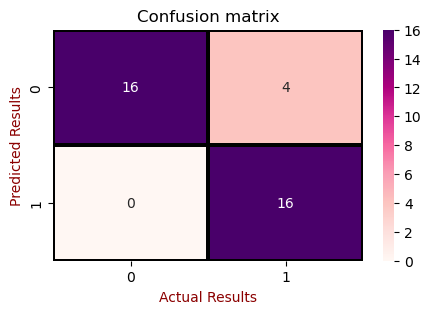

In [377]:
plot_confusion_matrix(y_test,y_pred_gbc)

In [379]:
# Cross validating our model
gbc = GradientBoostingClassifier(random_state = 42)
perform_cross_validation(gbc,'gbc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s


Cross validation scores for each model :  [0.82352941 0.73684211 0.61538462 0.82352941 0.875      0.58823529
 0.82352941 0.77777778 0.8        0.61538462]
Mean of the f1 scores from the cross validation test :  0.7479212643221931
Standard deviation of the f1 scores from the cross validation test :  0.09882138964560584


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [381]:
# Performing hyperparmeter tuning for the gradientboosting classifier model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
gbc = GradientBoostingClassifier(random_state = 42)
skf = StratifiedKFold(n_splits = 10, shuffle = True , random_state = 42)

param_grid_gbc = {
    'learning_rate':[0.01,0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,300],
    'max_depth':[5,10,15,20,30],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,3,6,10,20],
    'max_features':['auto','sqrt','log2']
}

# gscv = GridSearchCV(estimator = gbc,scoring = 'f1',cv = skf,param_grid = param_grid_gbc,verbose = 1,n_jobs = -1)
rscv = RandomizedSearchCV(estimator = gbc,n_iter = 200,scoring = 'f1',cv = skf,param_distributions = param_grid_gbc,verbose = 1,n_jobs = -1,random_state = 42)
# gscv.fit(X_train_sc,y_train)
rscv.fit(X_train_sc,y_train)

# best_params = gscv.best_params_
best_params = rscv.best_params_
print('Best parameters from the search cv model are : ',best_params)
# print('Best Estimator from the grid search cv model are : ',gscv.best_estimator_)
print('Best Estimator from the search cv model are : ',rscv.best_estimator_)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters from the search cv model are :  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 15, 'learning_rate': 0.05}
Best Estimator from the search cv model are :  GradientBoostingClassifier(learning_rate=0.05, max_depth=15,
                           max_features='log2', min_samples_leaf=3,
                           random_state=42)


In [383]:
# Evaluating our model with tuned results
gbc1 = GradientBoostingClassifier(n_estimators = best_params['n_estimators'],min_samples_split = best_params['min_samples_split'],min_samples_leaf = best_params['min_samples_leaf'],\
                                 max_features = best_params['max_features'],max_depth = best_params['max_depth'],learning_rate = best_params['learning_rate'],\
                                 random_state = 42)
gbc1.fit(X_train_sc,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=15,
                           max_features='log2', min_samples_leaf=3,
                           random_state=42)

In [385]:
y_pred_gbc1 = gbc1.predict(X_test_sc)
y_prob_gbc1 = gbc1.predict_proba(X_test_sc)[:,1]
y_pred_gbc1

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [387]:
class_report(y_test,y_pred_gbc1)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



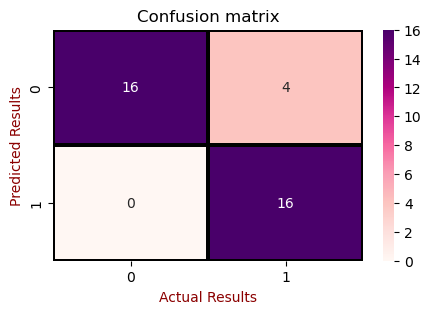

In [389]:
plot_confusion_matrix(y_test,y_pred_gbc1)

In [391]:
# Cross validating our model
perform_cross_validation(gbc1,'gbc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.5s


Cross validation scores for each model :  [0.82352941 0.875      0.8        0.75       0.93333333 0.5
 0.875      0.73684211 0.66666667 0.71428571]
Mean of the f1 scores from the cross validation test :  0.7674657231313577
Standard deviation of the f1 scores from the cross validation test :  0.1185791952675486


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


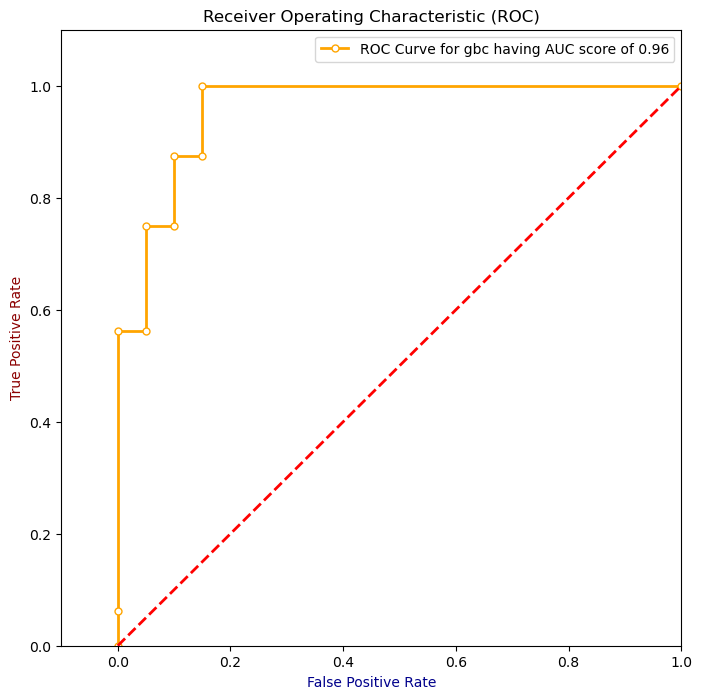

In [392]:
# ROC and AUC curve for the model
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_prob_gbc1)
auc = roc_auc_score(y_true = y_test,y_score = y_prob_gbc1)
plot_roc_curve(fpr,tpr,auc,'gbc','orange')

## **Logistic Regression**

In [396]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train_sc,y_train)

LogisticRegression(random_state=42)

In [398]:
y_pred_lr = lr.predict(X_test_sc)
y_pred_lr

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [400]:
class_report(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



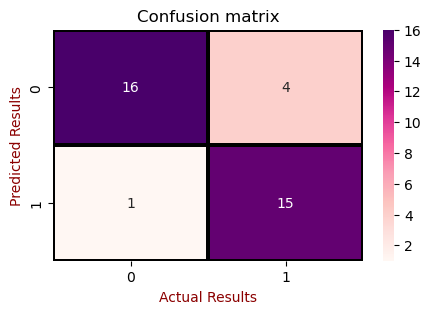

In [402]:
plot_confusion_matrix(y_test,y_pred_lr)

In [404]:
# Cross validating our model
lr = LogisticRegression(random_state = 42)
perform_cross_validation(lr,'lr')

Cross validation scores for each model :  [0.82352941 0.875      0.66666667 0.70588235 0.875      0.71428571
 0.875      0.875      0.8        0.85714286]
Mean of the f1 scores from the cross validation test :  0.806750700280112
Standard deviation of the f1 scores from the cross validation test :  0.07736024032983628


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [406]:
# Performing Hyperparameter tuning for the logistic regression model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold

lr = LogisticRegression(random_state = 42)

param_grid_lr = {
    'penalty':['l1','l2','elasticnet','None'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'C':[0.01,0.05,0.1,0.2,1,2],
    'max_iter':[20,30,50,80,100],
    'class_weight':[None,'balanced'],
    'l1_ratio':[0.0,0.3,0.5,0.8,1.0], # specifically when penalty is equal to 'elasticnet'
    'fit_intercept':[True,False] 
}

skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)
gscv = GridSearchCV(estimator = lr,scoring = 'f1',param_grid = param_grid_lr,verbose = 1,n_jobs = -1,cv = skf)
# rscv = RandomizedSearchCV(n_iter = 100,estimator = lr,scoring = 'f1',param_distributions = param_grid_lr,verbose = 1,n_jobs = -1,cv = skf,random_state = 42)

gscv.fit(X_train_sc,y_train)
# rscv.fit(X_train_sc,y_train)
best_params = gscv.best_params_
# best_params = rscv.best_params_
best_score = gscv.best_score_
# best_score = rscv.best_score_
print('Best parameters from the search cv model are : ',best_params)
print('Best Estimator from the search cv model are : ',gscv.best_estimator_)
print('Best score of hyperparameters from the search results : ',best_score)
# print('Best Estimator from the grid search cv model are : ',rscv.best_estimator_)

Fitting 10 folds for each of 12000 candidates, totalling 120000 fits
Best parameters from the search cv model are :  {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': False, 'l1_ratio': 0.5, 'max_iter': 20, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Estimator from the search cv model are :  LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=False,
                   l1_ratio=0.5, max_iter=20, penalty='elasticnet',
                   random_state=42, solver='saga')
Best score of hyperparameters from the search results :  0.7883852258852259


In [408]:
# Evaluating our model with the hyperparameter results
lr1 = LogisticRegression(random_state = 42,C = best_params['C'],class_weight = best_params['class_weight'],fit_intercept = best_params['fit_intercept'],\
                        l1_ratio = best_params['l1_ratio'],max_iter = best_params['max_iter'],penalty = best_params['penalty'],solver = best_params['solver'])
lr1.fit(X_train_sc,y_train)

LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=False,
                   l1_ratio=0.5, max_iter=20, penalty='elasticnet',
                   random_state=42, solver='saga')

In [410]:
y_pred_lr1 = lr1.predict(X_test_sc)
y_prob_lr1 = lr1.predict_proba(X_test_sc)[:,1]
y_pred_lr1

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [412]:
# Classification report
class_report(y_test,y_pred_lr1)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



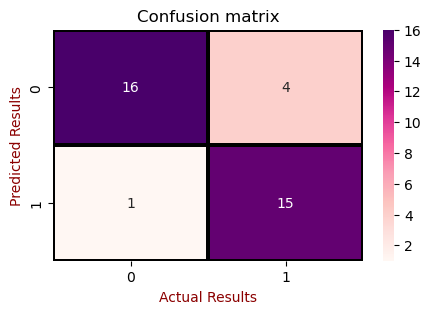

In [414]:
# confusion matrix 
plot_confusion_matrix(y_test,y_pred_lr1)

In [416]:
# cross validating our model
perform_cross_validation(lr1,'lr')

Cross validation scores for each model :  [0.82352941 0.875      0.8        0.73684211 0.94117647 0.66666667
 0.82352941 0.88888889 0.8        0.93333333]
Mean of the f1 scores from the cross validation test :  0.8288966288269692
Standard deviation of the f1 scores from the cross validation test :  0.08109168915440564


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


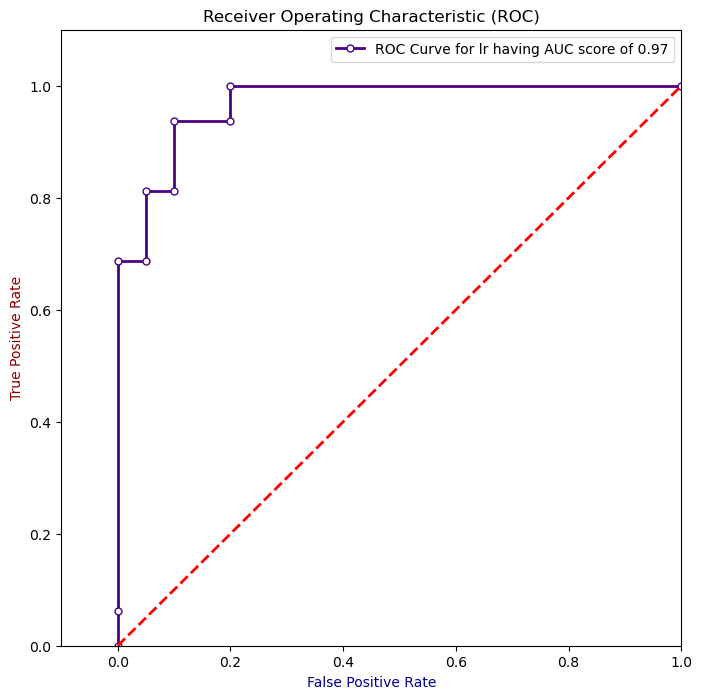

In [418]:
# ROC and AUC curve for the model
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_true = y_test,y_score = y_prob_lr1)
auc = roc_auc_score(y_true = y_test,y_score = y_prob_lr1)
plot_roc_curve(fpr,tpr,auc,'lr','indigo')

## **XGBoost Classifier Model**

In [421]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train_sc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [423]:
# now making predictions for the model
y_pred_xgb = xgb.predict(X_test_sc)
y_pred_xgb

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [425]:
# classification report
class_report(y_t = y_test,y_p = y_pred_xgb)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



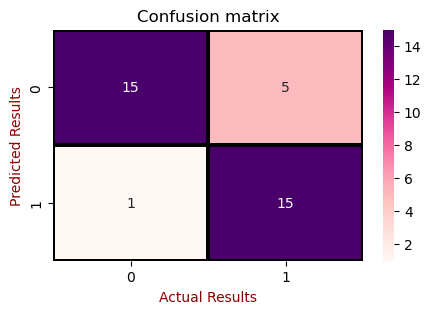

In [439]:
# confusion matrix
plot_confusion_matrix(y_t = y_test,y_p = y_pred_xgb)

In [429]:
# Performing hyperparameter tuning to further improve the performance of xgboostclassifier model
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,GridSearchCV

xgb = XGBClassifier(random_state = 42)

param_grid_xgb = {
    'learning_rate':[0.001,0.01,0.05,0.1,0.2],
    'n_estimators':[100,200,300],
    'max_depth':[5,10,15,20,30],
    'max_leaves':[3,5,8,10,12,20],
    'booster':['gbtree','gblinear','dart'],
    'min_child_weight':[1,3,5,8,10],
    'gamma':[0,0.01,0.2,0.5,1],
    'subsample':[0.5,0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0,1.5,2.0]
}

skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)
rscv = RandomizedSearchCV(estimator = xgb,param_distributions = param_grid_xgb,n_iter = 150,scoring = 'f1',cv = skf,verbose = 1,random_state = 42)
rscv.fit(X_train_sc,y_train)

best_params = rscv.best_params_
print('Best parameters from the search cv model : ',best_params)
print('Best estimator for the search cv model : ',rscv.best_estimator_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best parameters from the search cv model :  {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_leaves': 8, 'max_depth': 5, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 1.0, 'booster': 'gblinear'}
Best estimator for the search cv model :  XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator

In [441]:
# Evaluating our model with hyperparameters 
xgb1 = XGBClassifier(random_state = 42,learning_rate = best_params['learning_rate'],n_estimators = best_params['n_estimators'],max_depth = best_params['max_depth'],\
                    max_leaves = best_params['max_leaves'],booster = best_params['booster'],min_child_weight = best_params['min_child_weight'],gamma = best_params['gamma'],\
                    subsample = best_params['subsample'],colsample_bytree = best_params['colsample_bytree'])
xgb1.fit(X_train_sc,y_train)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [443]:
y_pred_xgb1 = xgb1.predict(X_test_sc)
y_prob_xgb1 = xgb1.predict_proba(X_test_sc)[:,1]
y_pred_xgb1

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [445]:
class_report(y_t = y_test, y_p = y_pred_xgb1)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



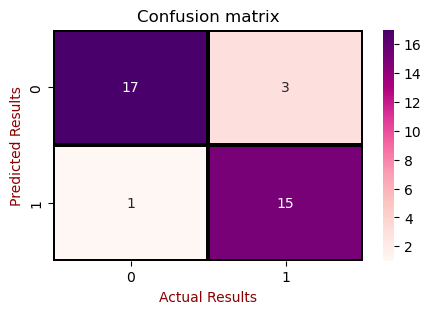

In [447]:
plot_confusion_matrix(y_t = y_test, y_p = y_pred_xgb1)

In [449]:
# cross validating our model
perform_cross_validation(xgb1,'xgboost')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.0s remaining:    2.6s


Cross validation scores for each model :  [0.85714286 0.93333333 0.85714286 0.75       0.875      0.66666667
 0.75       0.875      0.8        0.76923077]
Mean of the f1 scores from the cross validation test :  0.8133516483516484
Standard deviation of the f1 scores from the cross validation test :  0.0758289181154017


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


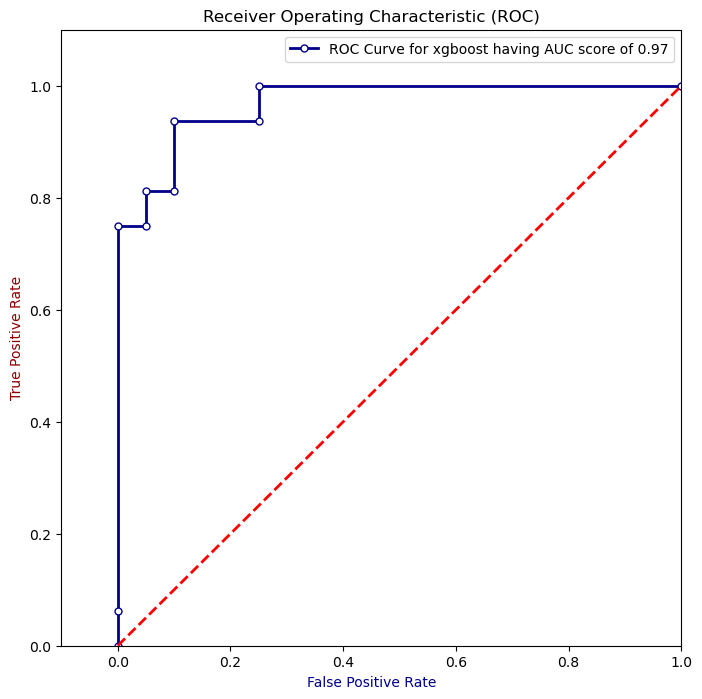

In [453]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,y_prob_xgb1)
auc = roc_auc_score(y_test,y_prob_xgb1)
plot_roc_curve(fpr,tpr,auc,'xgboost','darkblue')

## **Best Model for our Project**

### **Model with the Best Accuracy Score**

In [455]:
from sklearn.metrics import accuracy_score
model_acu_scores = list() # an empty list
model_names = ['K-Nearest-Neighbors','Decision-Tree-Classifier','Support-Vector-Classifier',\
               'Random-Forest-Classifier','Gradient-Boosting-Classifier','Logistic-Regression'\
              'Xgboost-Classifier']
predictions = [y_pred_knn1,y_pred_dtc1,y_pred_svc1,y_pred_rfc1,y_pred_gbc1,y_pred_lr1,y_pred_xgb1]

for x in predictions:
    tp = accuracy_score(y_true = y_test,y_pred = x)
    model_acu_scores.append(tp)
print('Accuracy scores for the models are :- ')
for x,y in zip(model_names,model_acu_scores):
    print('Model : ',x,', Accuracy score :',y)
    

Accuracy scores for the models are :- 
Model :  K-Nearest-Neighbors , Accuracy score : 0.8611111111111112
Model :  Decision-Tree-Classifier , Accuracy score : 0.8055555555555556
Model :  Support-Vector-Classifier , Accuracy score : 0.8888888888888888
Model :  Random-Forest-Classifier , Accuracy score : 0.9166666666666666
Model :  Gradient-Boosting-Classifier , Accuracy score : 0.8888888888888888
Model :  Logistic-RegressionXgboost-Classifier , Accuracy score : 0.8611111111111112


In [459]:
print('No of models used for the project :- ',len(model_names))

No of models used for the project :-  6


In [482]:

if len(model_names) != len(model_acu_scores):
    min_length = min(len(model_names), len(model_acu_scores))
    model_names = model_names[:min_length]  # Trim to the shortest length
    model_acu_scores = model_acu_scores[:min_length]

# Creating the DataFrame
mydata = {'Machine Learning Models': model_names, 'Accuracy Scores': model_acu_scores}
acc_dt = pd.DataFrame(mydata)

print(acc_dt)


                 Machine Learning Models  Accuracy Scores
0                    K-Nearest-Neighbors         0.861111
1               Decision-Tree-Classifier         0.805556
2              Support-Vector-Classifier         0.888889
3               Random-Forest-Classifier         0.916667
4           Gradient-Boosting-Classifier         0.888889
5  Logistic-RegressionXgboost-Classifier         0.861111


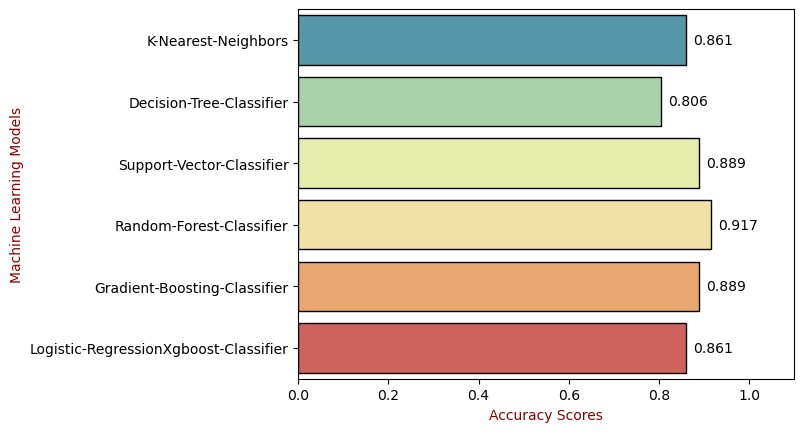

In [467]:
sns.barplot(data = acc_dt,y = 'Machine Learning Models',x = 'Accuracy Scores',hue = 'Machine Learning Models',palette = 'Spectral_r',edgecolor = 'black')
for ind,row in acc_dt.iterrows():
    plt.text(row['Accuracy Scores'] + 0.015,ind,f"{row['Accuracy Scores']:.3f}",ha = 'left',va = 'center')

plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlim(0,1.1)
plt.xlabel('Accuracy Scores',color = 'darkred')
plt.ylabel('Machine Learning Models',color = 'darkred')
plt.show()

- Accuracy scores of **Random Forest Classifier** and **Gradient Boosting Classifier** **(0.917 & 0.889)** are of the highest among the machine learning models.
- If we are looking for a model which predicts proper values/classes with respect to the original class values without looking into the data distributions of the class labels then we can prefer **Random Forest Classifier** and **Gradient Boosting Classifier** for that purpose.

### **Model with the Best Recall Score**

In [471]:
from sklearn.metrics import recall_score
model_recall_scores = list()

for x in predictions:
    tp = recall_score(y_true = y_test,y_pred = x,average = 'binary')
    model_recall_scores.append(tp)
print('Recall scores for the models are :- ')
for x,y in zip(model_names,model_recall_scores):
    print('Model : ',x,', Recall score :',y)

Recall scores for the models are :- 
Model :  K-Nearest-Neighbors , Recall score : 1.0
Model :  Decision-Tree-Classifier , Recall score : 0.875
Model :  Support-Vector-Classifier , Recall score : 0.9375
Model :  Random-Forest-Classifier , Recall score : 1.0
Model :  Gradient-Boosting-Classifier , Recall score : 1.0
Model :  Logistic-RegressionXgboost-Classifier , Recall score : 0.9375


In [478]:
min_length = min(len(model_names), len(model_recall_scores))

# Trim lists to match the shortest length
model_names = model_names[:min_length]
model_recall_scores = model_recall_scores[:min_length]

# Creating DataFrame
mydata1 = {'Machine Learning Models': model_names, 'Recall Scores': model_recall_scores}
recall_dt = pd.DataFrame(mydata1)

print(recall_dt)


                 Machine Learning Models  Recall Scores
0                    K-Nearest-Neighbors         1.0000
1               Decision-Tree-Classifier         0.8750
2              Support-Vector-Classifier         0.9375
3               Random-Forest-Classifier         1.0000
4           Gradient-Boosting-Classifier         1.0000
5  Logistic-RegressionXgboost-Classifier         0.9375


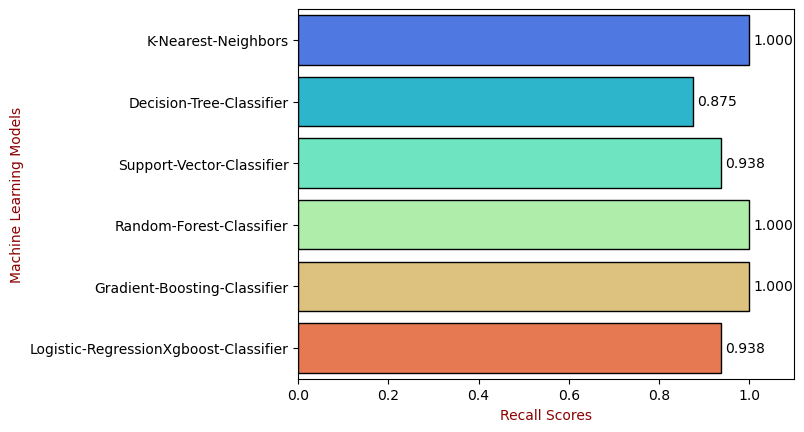

In [484]:
sns.barplot(data = recall_dt,y = 'Machine Learning Models',x = 'Recall Scores',hue = 'Machine Learning Models',palette = 'rainbow',edgecolor = 'black')
for ind,row in recall_dt.iterrows():
    plt.text(row['Recall Scores'] + 0.01,ind,f"{row['Recall Scores']:.3f}",ha = 'left',va = 'center')

plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Recall Scores',color = 'darkred')
plt.ylabel('Machine Learning Models',color = 'darkred')
plt.xlim(0,1.1)
plt.show()

- Models such as **K-nearest-neighbors, Random Forest Classifier, Gradient Boosting Classifier** are having a **Recall Score** of perfect **1.0**.
- which depicts that all these models have predicted **100%** of all the **actual positive case (presence of heart disease - 1)** of the dataset, but still there may be chances of classes which are **not-positive (absence of heart disease - 0)** but may be incorrectly classified as positive.
- If we are looking for models which can only classify actual positive cases then we will prefer all the above mentioned machine learning models for that purpose.

### **Model with the Best Precision Score**

In [488]:
from sklearn.metrics import precision_score

model_prec_scores = list()

for x in predictions:
    tp = precision_score(y_true = y_test,y_pred = x,average = 'binary')
    model_prec_scores.append(tp)
print('Precision scores for the models are :- ')
for x,y in zip(model_names,model_prec_scores):
    print('Model : ',x,', Precision score :',y)

Precision scores for the models are :- 
Model :  K-Nearest-Neighbors , Precision score : 0.7619047619047619
Model :  Decision-Tree-Classifier , Precision score : 0.7368421052631579
Model :  Support-Vector-Classifier , Precision score : 0.8333333333333334
Model :  Random-Forest-Classifier , Precision score : 0.8421052631578947
Model :  Gradient-Boosting-Classifier , Precision score : 0.8
Model :  Logistic-RegressionXgboost-Classifier , Precision score : 0.7894736842105263


In [493]:
min_length = min(len(model_names), len(model_prec_scores))

model_names = model_names[:min_length]
model_prec_scores = model_prec_scores[:min_length]

# Creating DataFrame
mydata2 = {'Machine Learning Models': model_names, 'Precision Scores': model_prec_scores}
precision_dt = pd.DataFrame(mydata2)

print(precision_dt)


                 Machine Learning Models  Precision Scores
0                    K-Nearest-Neighbors          0.761905
1               Decision-Tree-Classifier          0.736842
2              Support-Vector-Classifier          0.833333
3               Random-Forest-Classifier          0.842105
4           Gradient-Boosting-Classifier          0.800000
5  Logistic-RegressionXgboost-Classifier          0.789474


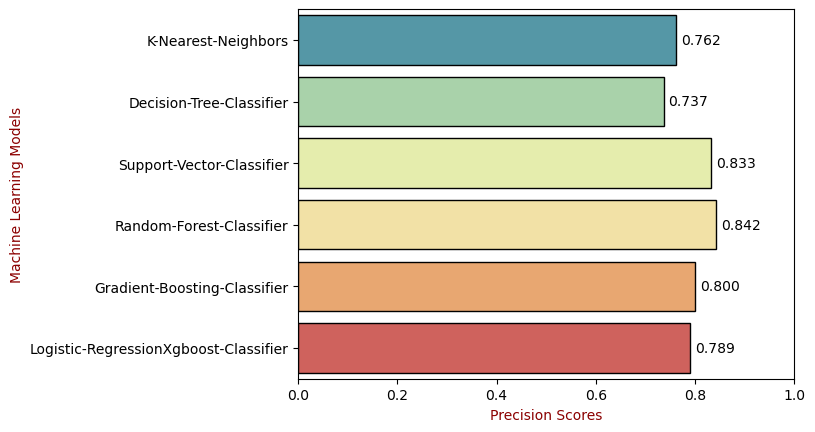

In [495]:
sns.barplot(data = precision_dt,y = 'Machine Learning Models',x = 'Precision Scores',hue = 'Machine Learning Models',palette = 'Spectral_r',edgecolor = 'black')
for ind,row in precision_dt.iterrows():
    plt.text(row['Precision Scores'] + 0.01,ind,f"{row['Precision Scores']:.3f}",ha = 'left',va = 'center')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Precision Scores',color = 'darkred')
plt.ylabel('Machine Learning Models',color = 'darkred')
plt.xlim(0,1.0)
plt.show()

- **Random Forest Classifier** and **Support vector classifier** models have high precision scores **(0.842 & 0.833)** than any other machine learning models.
- precision depicts that the models have predicted **84.2% positive cases(presence of heart disease-1)** which are **actually positive**, indicating that there may be classes which are incorrectly classified as positive but actually they are **not-positive(absence of heart disease-0)** cases.
- If we are looking for models which predicts postive values and then looks for actually positive values disregarding the incorrect classified postive ones, then we can choose **Random Forest Classifier** and **Support vector classifier** machine learning models.

### **Model with the Best F1 Score**

In [499]:
from sklearn.metrics import f1_score

model_f1_scores = list()

for x in predictions:
    tp = f1_score(y_true = y_test,y_pred = x,average = 'binary')
    model_f1_scores.append(tp)
print('F1 scores for the models are :- ')
for x,y in zip(model_names,model_f1_scores):
    print('Model : ',x,', F1 score :',y)

F1 scores for the models are :- 
Model :  K-Nearest-Neighbors , F1 score : 0.8648648648648649
Model :  Decision-Tree-Classifier , F1 score : 0.8
Model :  Support-Vector-Classifier , F1 score : 0.8823529411764706
Model :  Random-Forest-Classifier , F1 score : 0.9142857142857143
Model :  Gradient-Boosting-Classifier , F1 score : 0.8888888888888888
Model :  Logistic-RegressionXgboost-Classifier , F1 score : 0.8571428571428571


In [503]:
min_length = min(len(model_names), len(model_f1_scores))

model_names = model_names[:min_length]
model_f1_scores = model_f1_scores[:min_length]

# Creating DataFrame
mydata3 = {'Machine Learning Models': model_names, 'F1 Scores': model_f1_scores}
f1_dt = pd.DataFrame(mydata3)

print(f1_dt)


                 Machine Learning Models  F1 Scores
0                    K-Nearest-Neighbors   0.864865
1               Decision-Tree-Classifier   0.800000
2              Support-Vector-Classifier   0.882353
3               Random-Forest-Classifier   0.914286
4           Gradient-Boosting-Classifier   0.888889
5  Logistic-RegressionXgboost-Classifier   0.857143


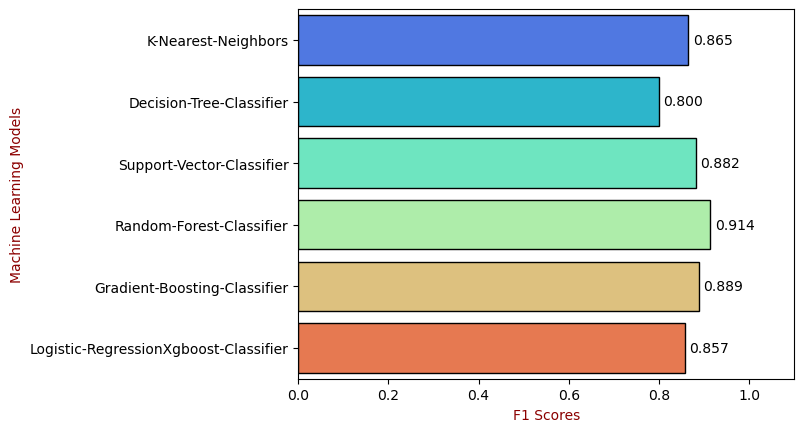

In [505]:
sns.barplot(data = f1_dt,y = 'Machine Learning Models',x = 'F1 Scores',hue = 'Machine Learning Models',palette = 'rainbow',edgecolor = 'black')
for ind,row in f1_dt.iterrows():
    plt.text(row['F1 Scores'] + 0.01,ind,f"{row['F1 Scores']:.3f}",ha = 'left',va = 'center')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('F1 Scores',color = 'darkred')
plt.ylabel('Machine Learning Models',color = 'darkred')
plt.xlim(0,1.1)
plt.show()

- Highest F1-score of **0.889** and **0.914** have been achieved by **Random Forest Classifier** and **Gradient Boosting Classifier** machine learning models.
- If we have an unbalanced dataset then we have to check **f1_score** for evaluating models performance instead of **accuracy score**.
- f1 score is a good metric which will evaluate models performance by taking into account data distributions of the classes in the dataset.
- As per our project, impressive f1 score of **0.914** gives the ability to our model to distinguish between binary classes(0 & 1) in an imbalanced dataset.
- So we prefer **Random Forest classifier** and **Gradient Boosting Classifier** for predicting imbalanced datasets.

## **Models with there Cross Validation Scores**

In [509]:
cv_scores = [0.8,0.81,0.75,0.81,0.815,0.78,0.80,0.82,0.80,0.83,0.82,0.81]
model_names1 = model_names[:-1]
model_names1

['K-Nearest-Neighbors',
 'Decision-Tree-Classifier',
 'Support-Vector-Classifier',
 'Random-Forest-Classifier',
 'Gradient-Boosting-Classifier']

In [513]:
min_length = min(len(model_names1), len(cv_scores))

model_names1 = model_names1[:min_length]
cv_scores = cv_scores[:min_length]

# Creating DataFrame
cv_df = pd.DataFrame({'Machine Learning Models': model_names1, 'Cv_Score': cv_scores})

print(cv_df)


        Machine Learning Models  Cv_Score
0           K-Nearest-Neighbors     0.800
1      Decision-Tree-Classifier     0.810
2     Support-Vector-Classifier     0.750
3      Random-Forest-Classifier     0.810
4  Gradient-Boosting-Classifier     0.815


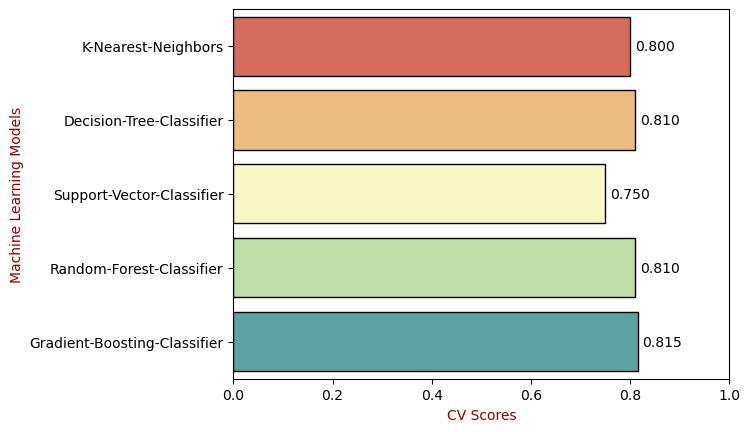

In [515]:
sns.barplot(data = cv_df,y = 'Machine Learning Models',x = 'Cv_Score',hue = 'Machine Learning Models',palette = 'Spectral',edgecolor = 'black')
for ind,row in cv_df.iterrows():
    plt.text(row['Cv_Score'] + 0.01,ind,f"{row['Cv_Score']:.3f}",ha = 'left',va = 'center')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('CV Scores',color = 'darkred')
plt.ylabel('Machine Learning Models',color = 'darkred')
plt.xlim(0,1.0)
plt.show()

- Cross validating the model helps us to determine the performance and generalization of the model.
- For our dataset the **Gradient boosting classifier** gives the best cross-validation score of **0.815**, also **Random Forest Classifier**  has the cross validation score of **0.810**, which is not so far from the cv score of logistic regression.

# **Conclusion**

- By lookig into all these metrics, cross_validation_score, including the auc_score and roc_curve plotted(auc_score for random forest and gradient boosting for every model we came to the conclusion that **Random Forest Classifier** and **Gradient Boosting Classifier** are the best machine learning models for our project.
- As these models are ensemble models which are robust to the scaling of the data and outliers, also can be trained even more to give accurate results.
- neural networks on the otherhand gives even more precise and accurate results but requires intense trail and error and tuning for all the hyperparameters in that model. so far from the neural network model we have achieved an impressive score of **0.889** for **f1 score** and **0.914** for accuracy but still it can be improved by proper tuning.

# **Suggestions for Hospitals to Enhance Heart Disease Predictions & Prevent Life Threats**


- **1.Implement AI-Powered Prediction Models** – Use machine learning-based diagnostic tools to analyze patient data and detect early warning signs of heart disease.

- **2️. Regular Screening Programs** – Conduct periodic heart check-ups, especially for high-risk individuals like those with diabetes, hypertension, and obesity.

- **3️.Integrate Electronic Health Records (EHRs) with Predictive Analytics** – Use patient history data to identify trends and provide early intervention strategies.

- **4️. Leverage Wearable & IoT Devices** – Encourage patients to use smartwatches and heart monitors to track real-time vitals like heart rate, ECG, and blood pressure.

- **5️.Real-Time Alert Systems** – Set up hospital-based and remote monitoring systems to detect abnormal vitals and send emergency alerts to healthcare providers.

- **6️. Enhance Patient Awareness & Education** – Organize workshops and counseling sessions to educate patients on heart disease risks, healthy lifestyle habits, and preventive measures.

- **7️.Promote Telemedicine & Remote Consultations** – Enable virtual doctor consultations for early diagnosis and monitoring of at-risk patients.

- **8️. Encourage Personalized Treatment Plans** – Use AI to tailor treatment and lifestyle recommendations based on individual patient profiles.

- **9️.Adopt Smart Medication Management Systems** – Implement digital tools to remind patients to take prescribed heart medications on time.

- **10.Collaboration with Fitness & Wellness Centers** – Partner with gyms and nutritionists to provide holistic cardiac care, including diet and exercise plans.